<a href="https://colab.research.google.com/github/rein55/Hyperparameter-Tunning/blob/main/Hyperparameter_Tunning_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import Model Machine Learning Regressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#load dataset breast cancer
from sklearn.datasets import load_breast_cancer

#Evaluasi Model
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import optuna

#Masukkan libraries lain jika dibutuhkan

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
#mengubah array X dan y diatas menjadi dataframe
X = pd.DataFrame(X)
y = pd.Series(y)
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


### 1. Lakukan proses analisis EDA dan Feature Engineering
- Feature Scalling, atau bahkan handling outlier, cek missing value serta handling jika ada, kemudian berikan alasan disetiap teknik yang digunakan Untuk Dataset tersebut

In [ ]:
y_train.head()

,0
68,1
181,0
63,1
248,1
60,1


In [ ]:
y_train.value_counts()

,count
1,286
0,169


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 68 to 102
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       455 non-null    float64
 1   1       455 non-null    float64
 2   2       455 non-null    float64
 3   3       455 non-null    float64
 4   4       455 non-null    float64
 5   5       455 non-null    float64
 6   6       455 non-null    float64
 7   7       455 non-null    float64
 8   8       455 non-null    float64
 9   9       455 non-null    float64
 10  10      455 non-null    float64
 11  11      455 non-null    float64
 12  12      455 non-null    float64
 13  13      455 non-null    float64
 14  14      455 non-null    float64
 15  15      455 non-null    float64
 16  16      455 non-null    float64
 17  17      455 non-null    float64
 18  18      455 non-null    float64
 19  19      455 non-null    float64
 20  20      455 non-null    float64
 21  21      455 non-null    float64
 22  22    

In [ ]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


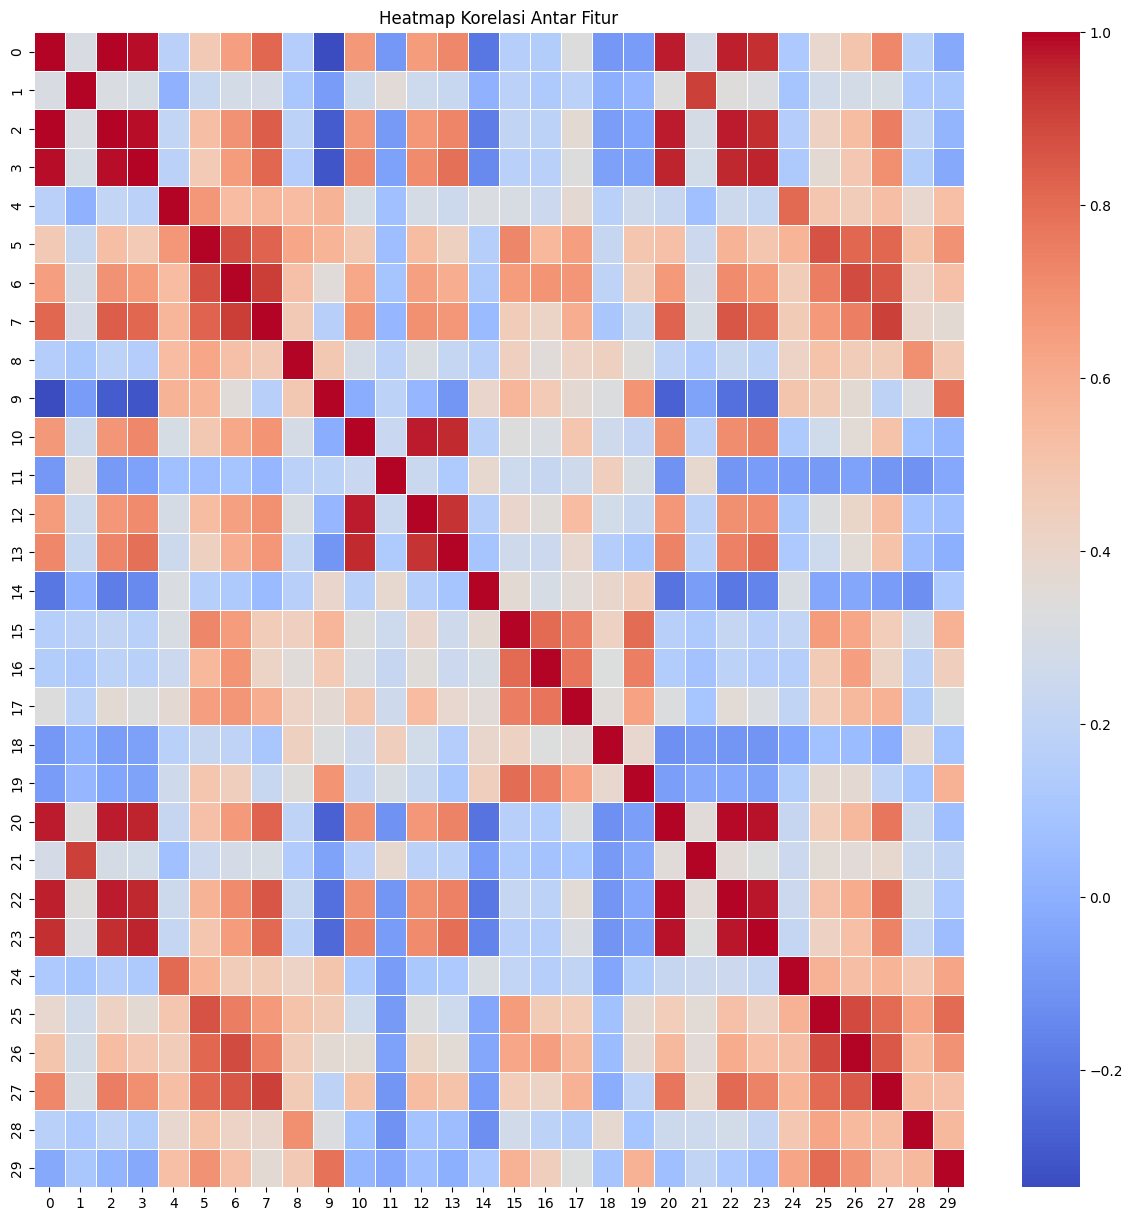

In [ ]:
# Visualisasi Korelasi Antar Fitur
plt.figure(figsize=(15,15))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

Conclusion Heatmap:
1. Warna merah tua menandakan korelasi positif yang sangat kuat antara fitur-fitur tertentu, sementara warna biru menandakan korelasi negatif.
2. Korelasi positif berarti bahwa ketika satu fitur naik, fitur lain cenderung naik juga. Sebaliknya, korelasi negatif berarti bahwa ketika satu fitur naik, fitur lain cenderung turun.
3. Ada beberapa grup fitur yang tampak sangat berkorelasi satu sama lain, seperti pada bagian atas-kiri dan bagian bawah-kanan dari heatmap.

In [ ]:
# Mengecek baris duplikat di seluruh dataset

duplicates = X.duplicated()
print("Jumlah Baris Duplikat:", duplicates.sum())

# Menampilkan baris yang duplikat jika ada
if duplicates.sum() > 0:
    print("Baris Duplikat:")
    print(X[duplicates])
else:
    print("Tidak ada baris duplikat pada dataset.")

Jumlah Baris Duplikat: 0
Tidak ada baris duplikat pada dataset.


Conclusion Duplicated:
1. Tidak terdapat baris yang duplikat pada dataset ini.
2. Menghilangkan duplikat adalah langkah penting dalam feature engineering untuk memastikan bahwa data yang digunakan benar-benar unik, representatif, dan berkualitas tinggi. Ini membantu mencegah bias, overfitting, dan masalah kualitas data lainnya, yang semuanya penting untuk membuat model yang dapat diandalkan dan akurat.

In [ ]:
# untuk plot Q-Q
import scipy.stats as stats

In [ ]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

0


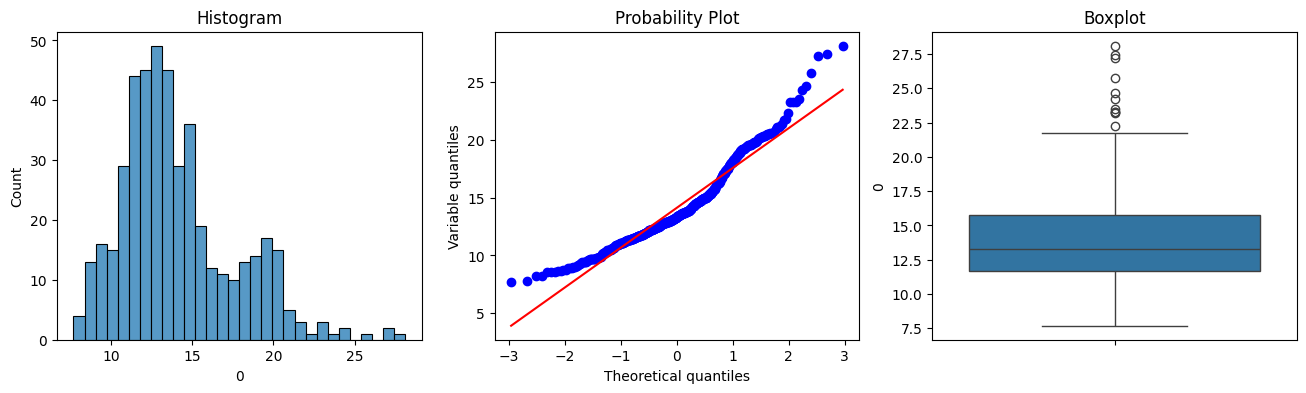

1


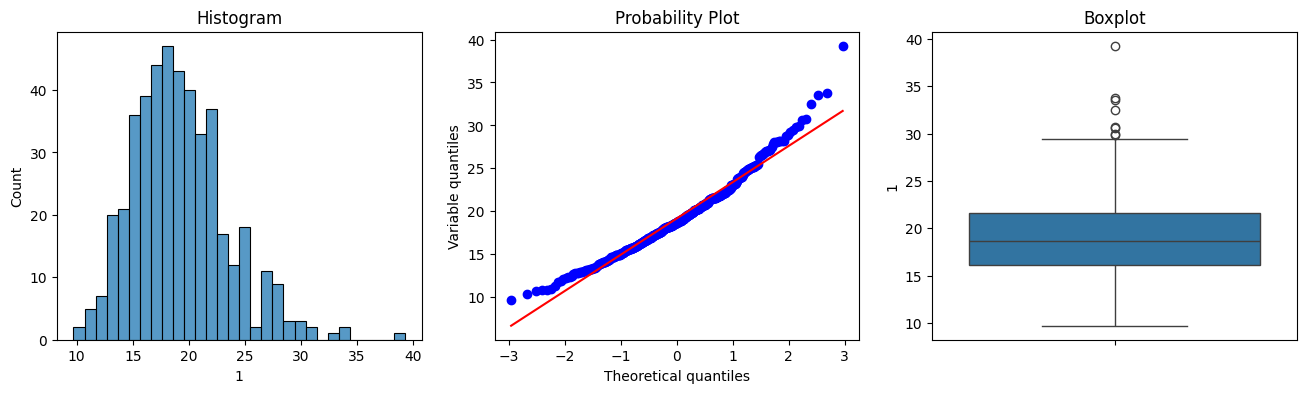

2


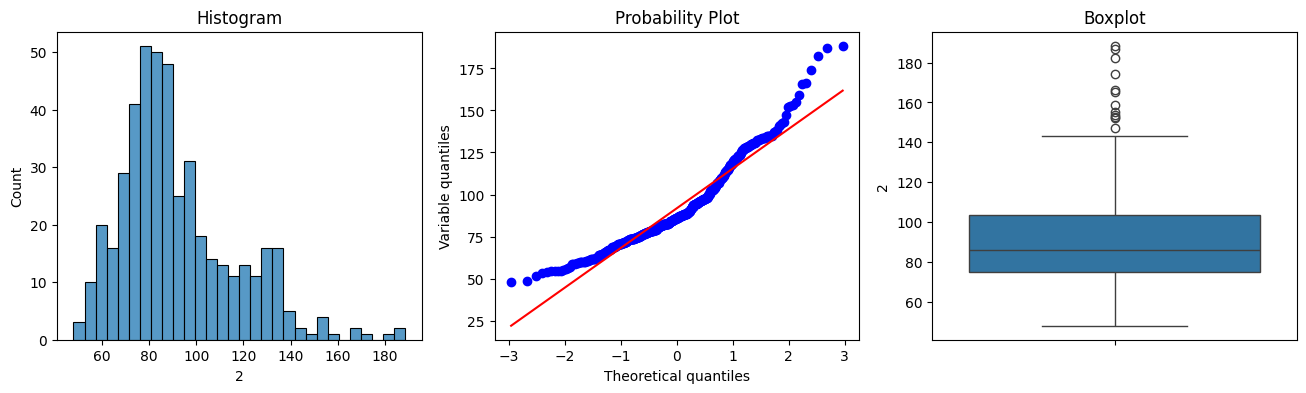

3


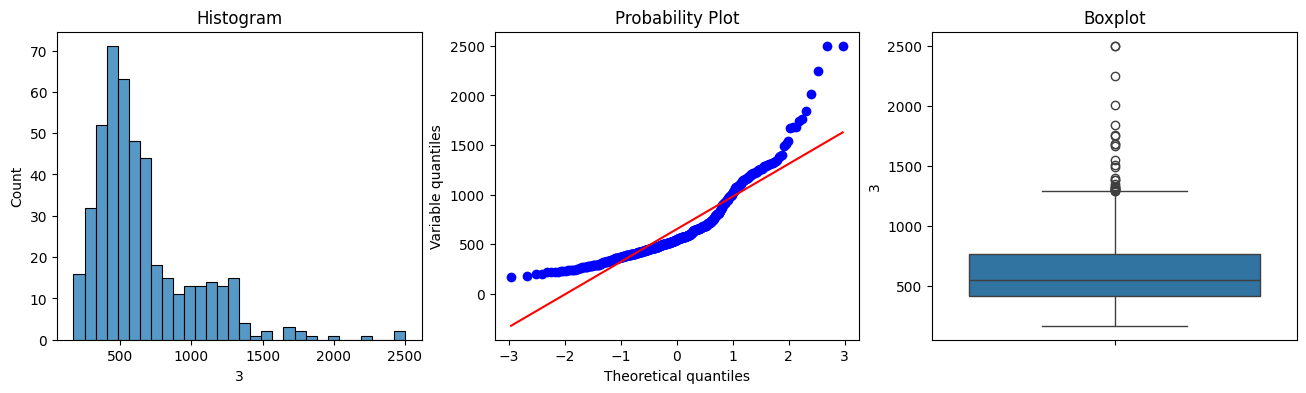

4


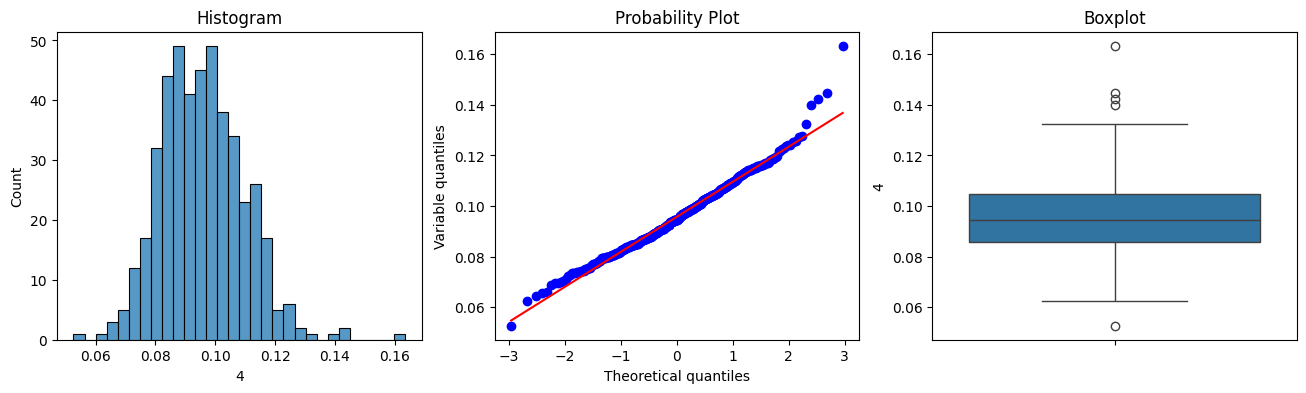

5


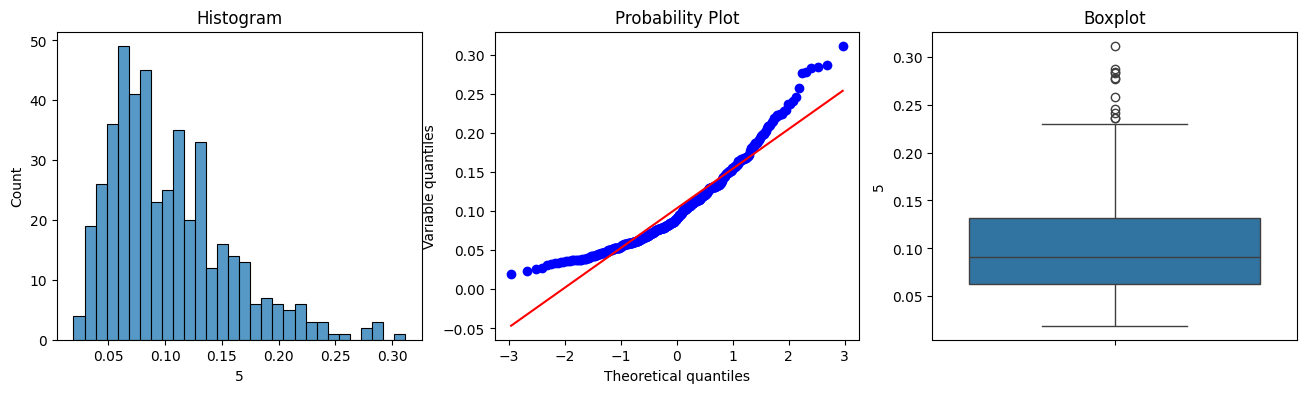

6


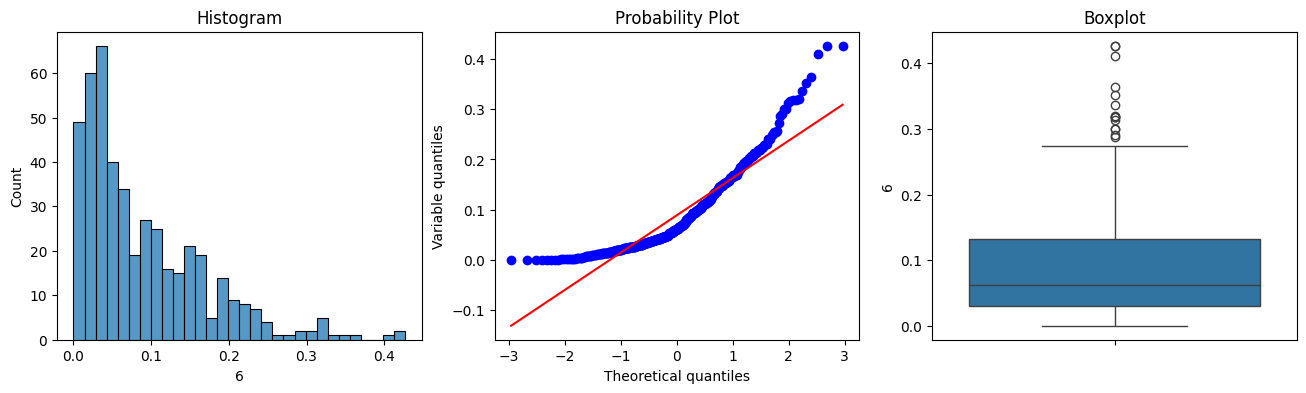

7


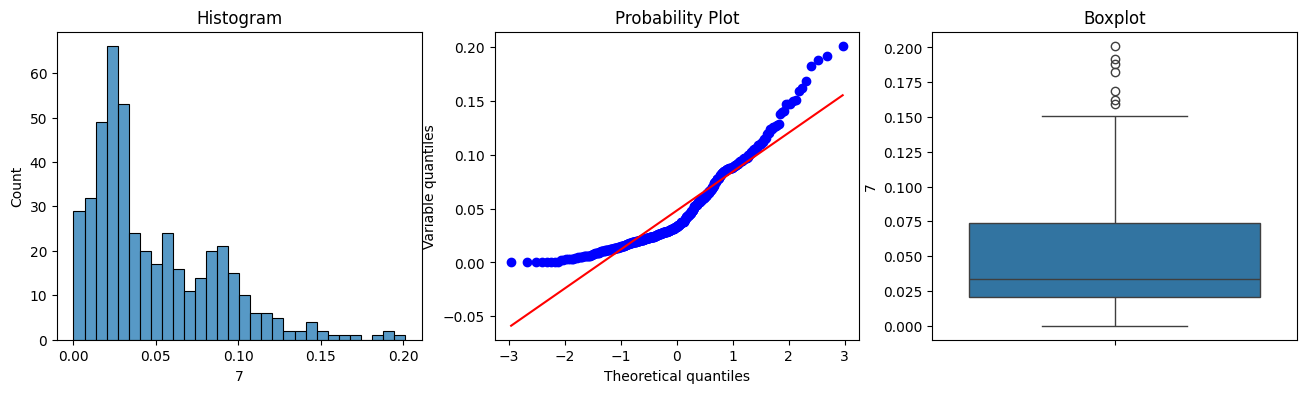

8


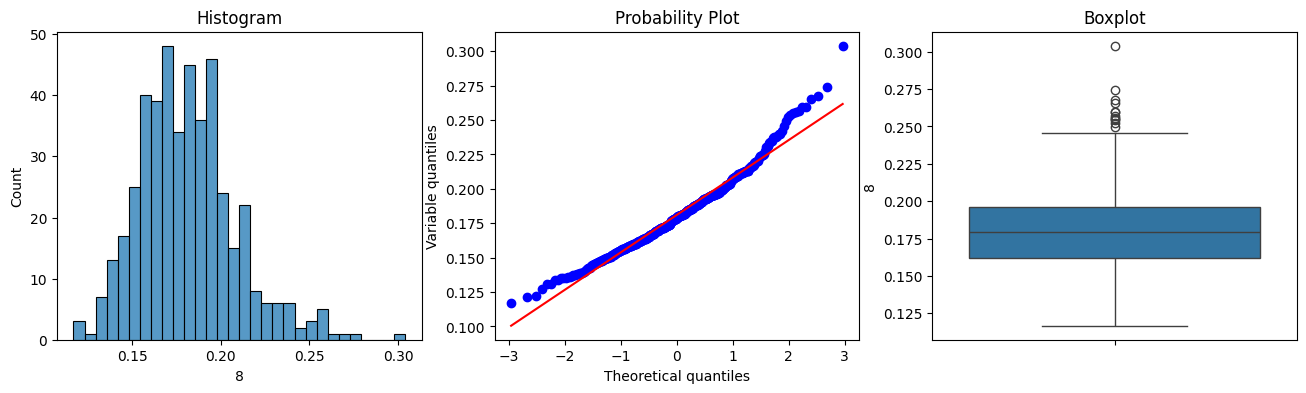

9


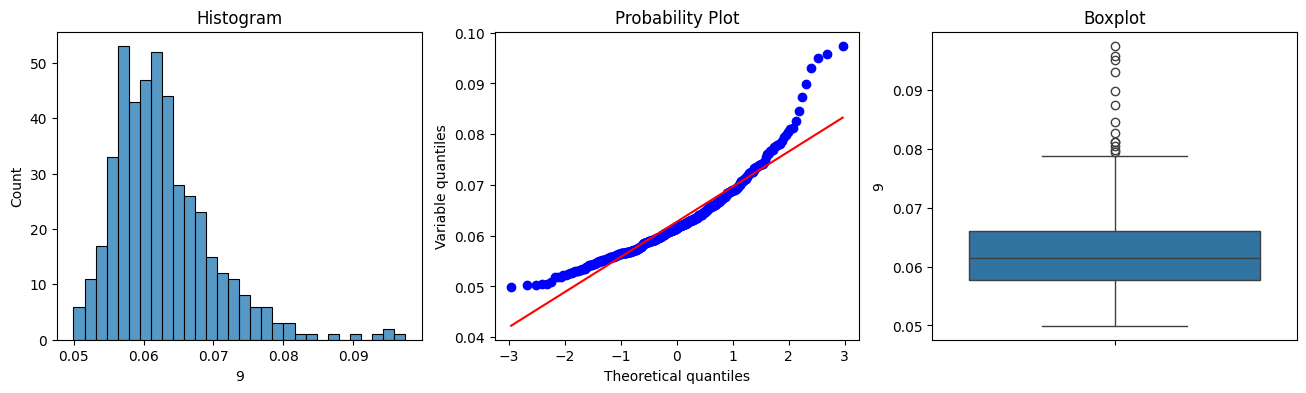

10


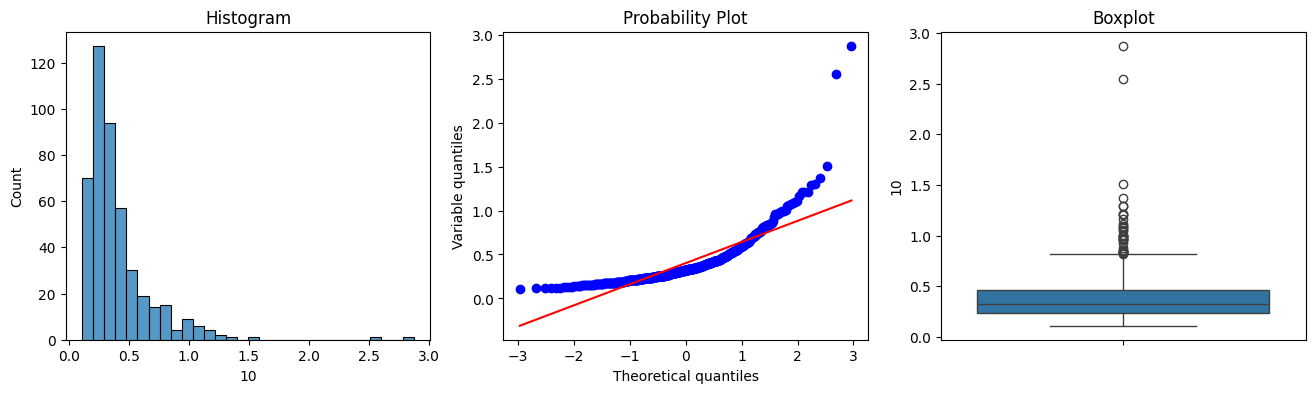

11


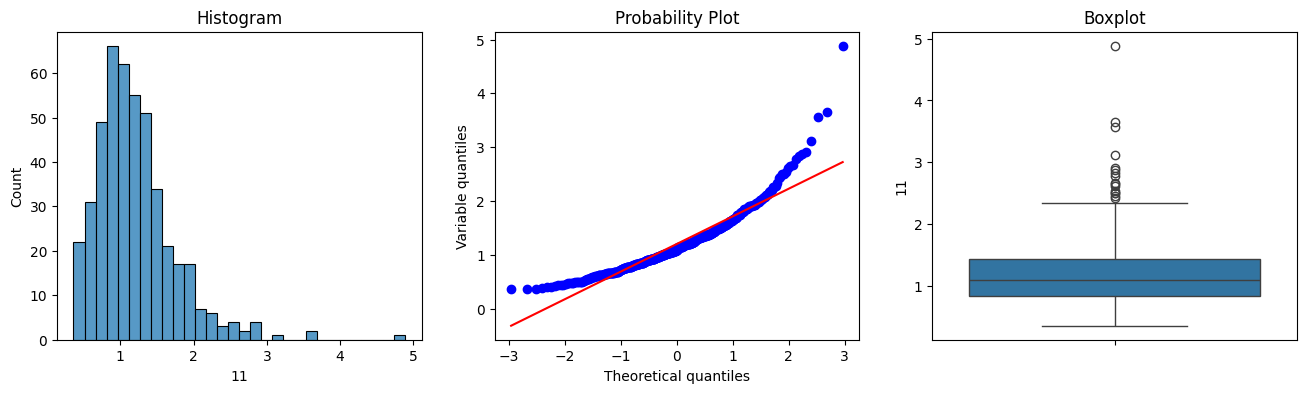

12


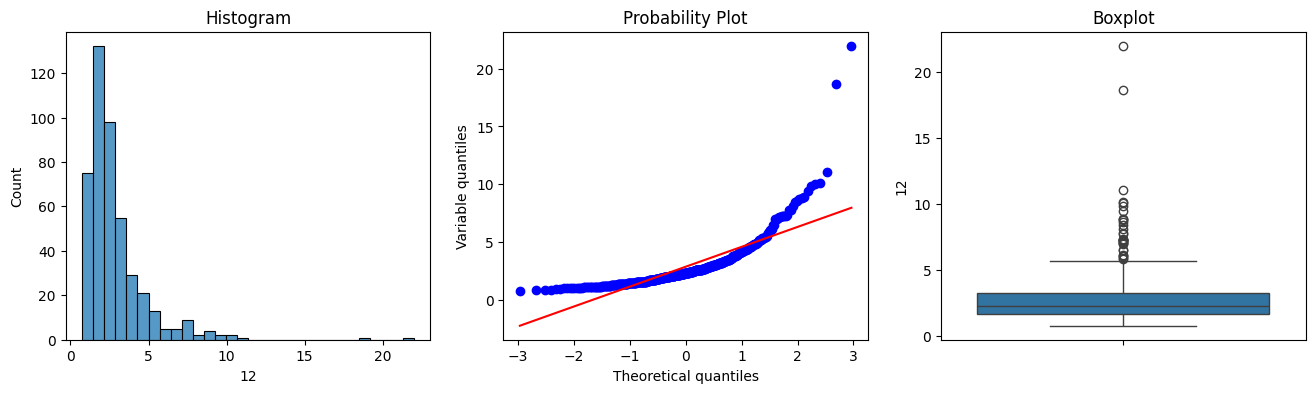

13


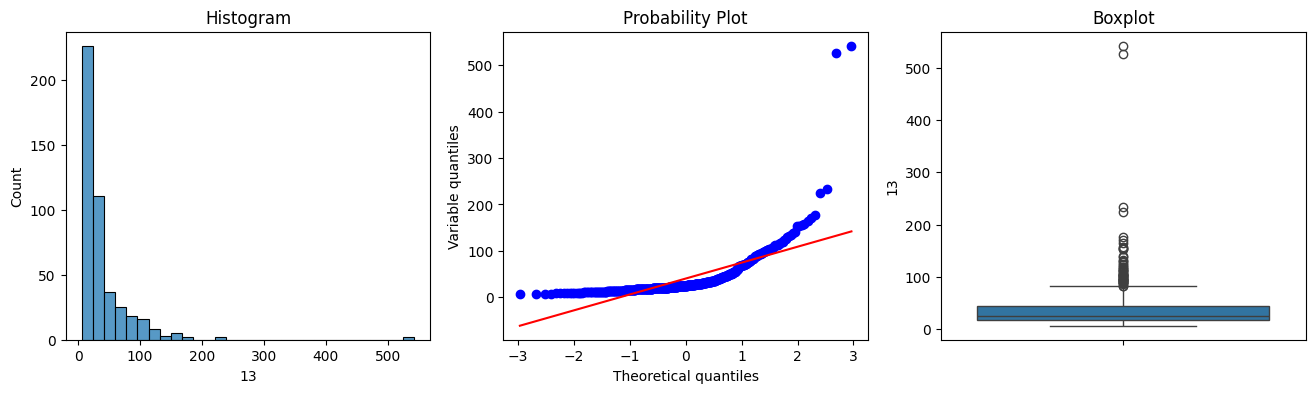

14


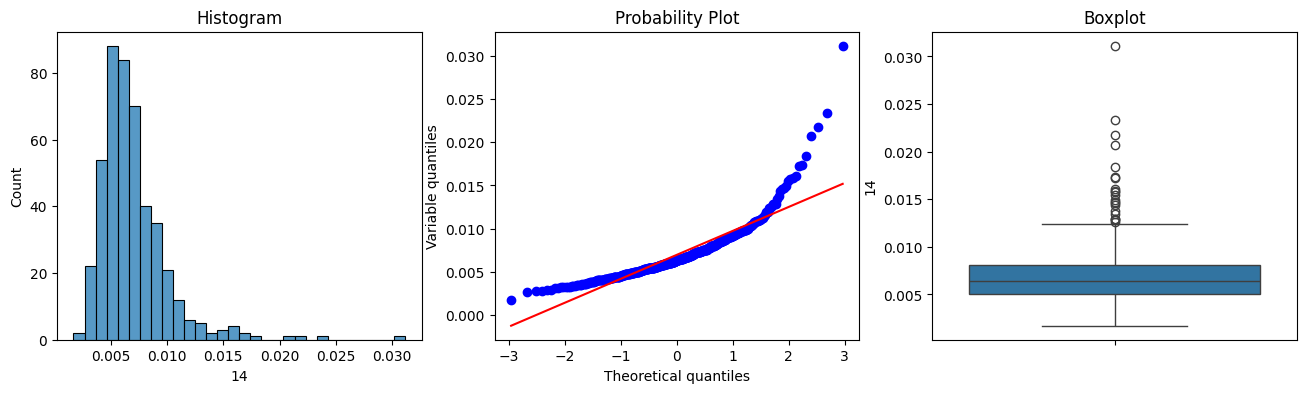

15


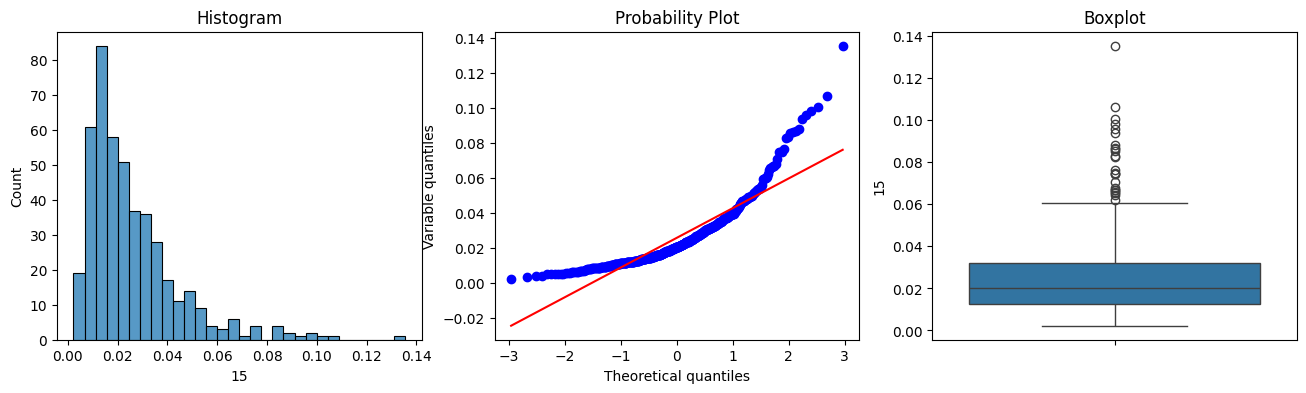

16


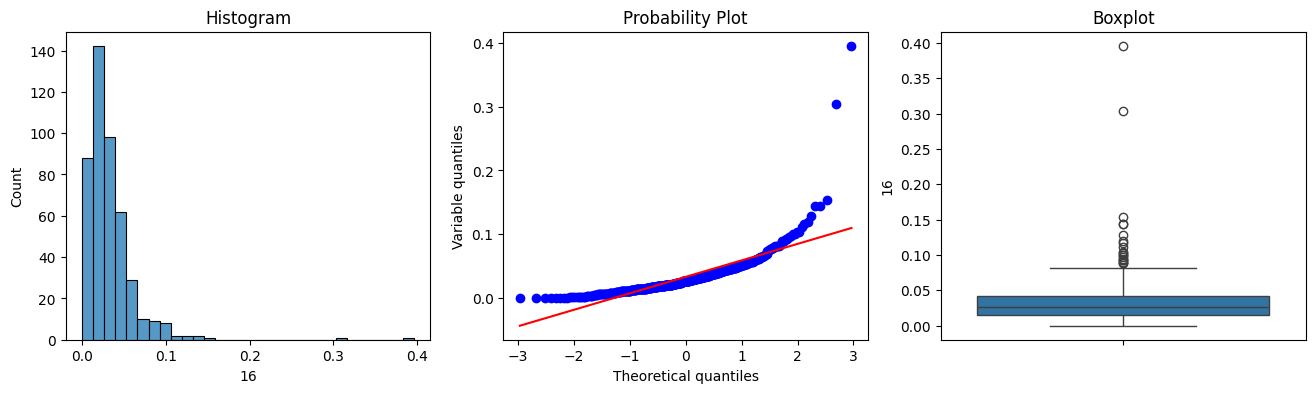

17


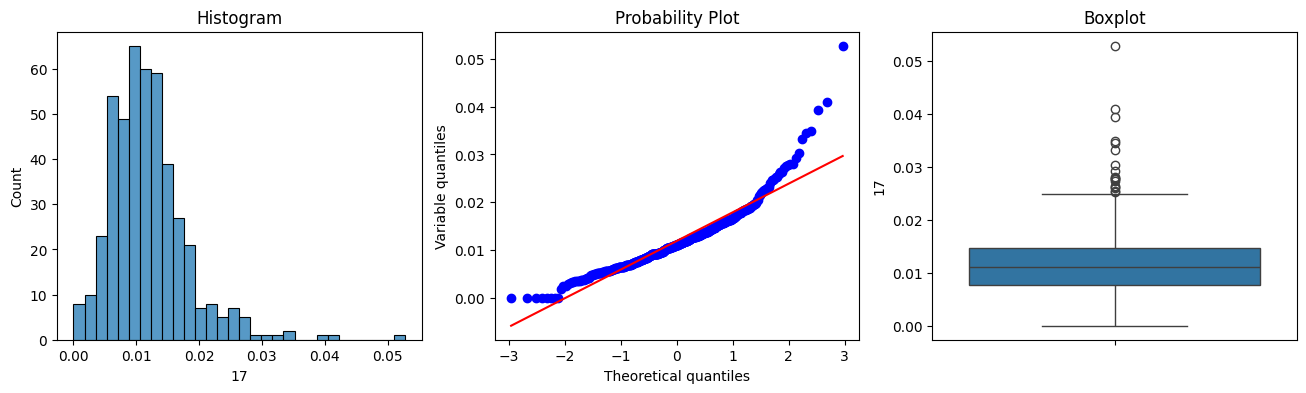

18


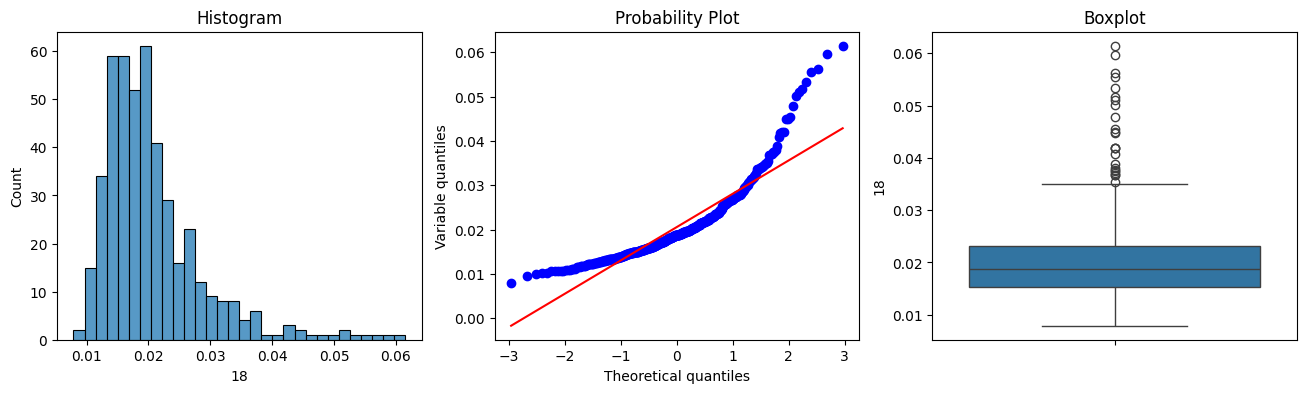

19


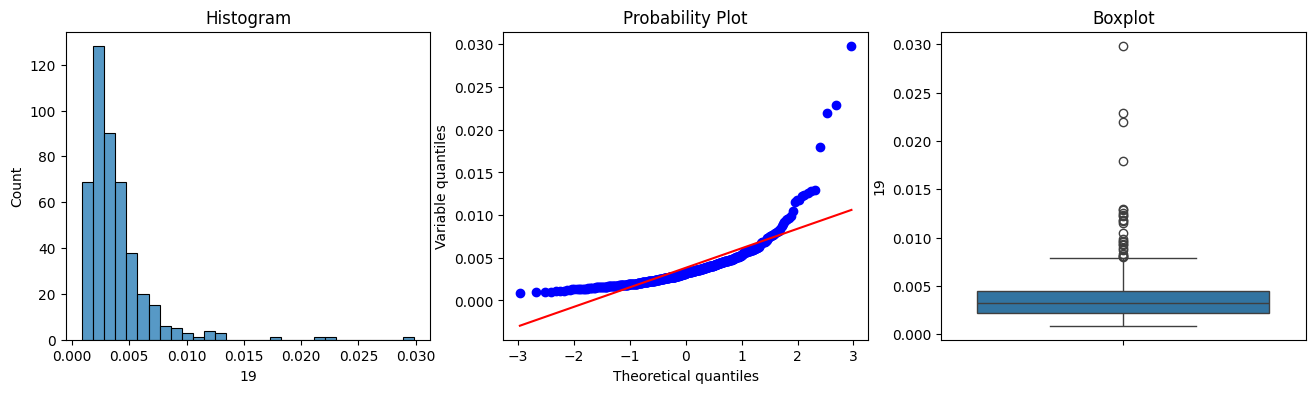

20


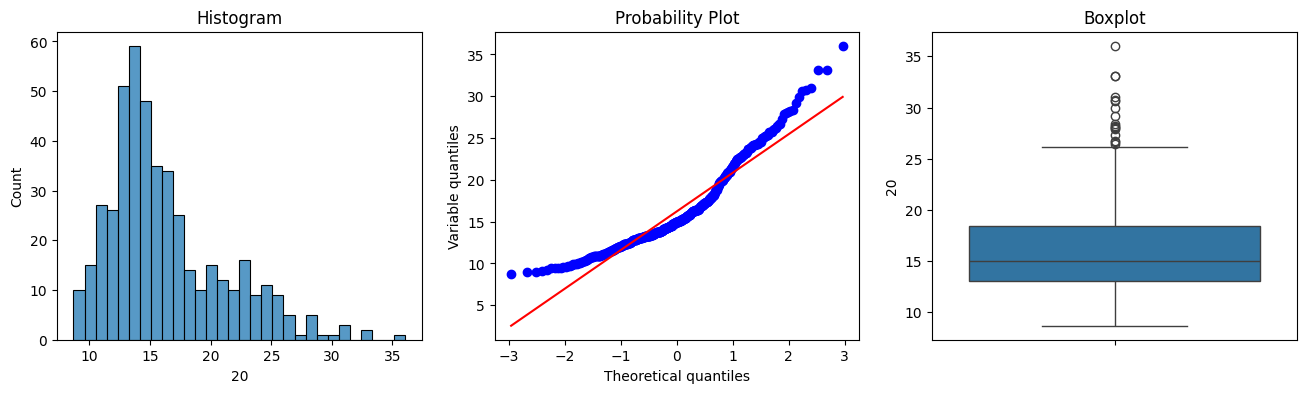

21


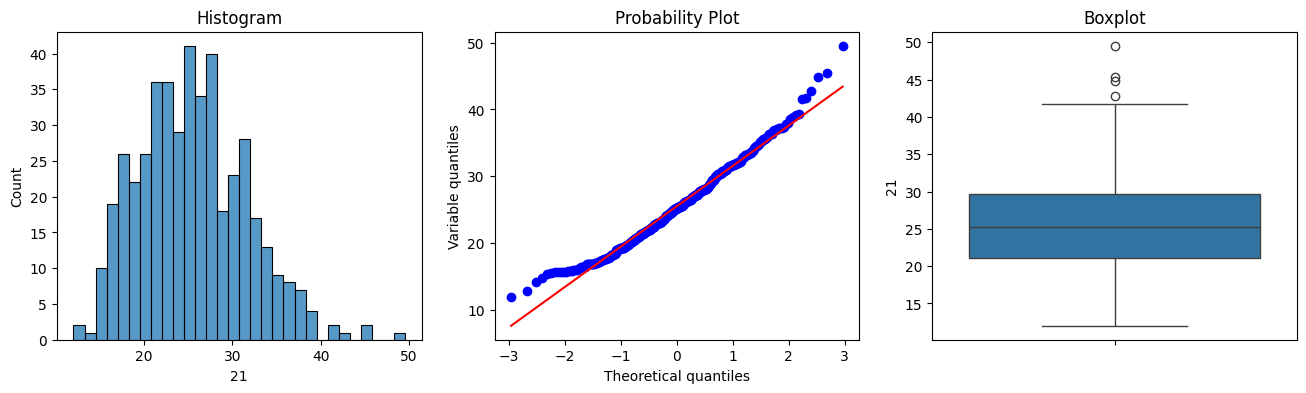

22


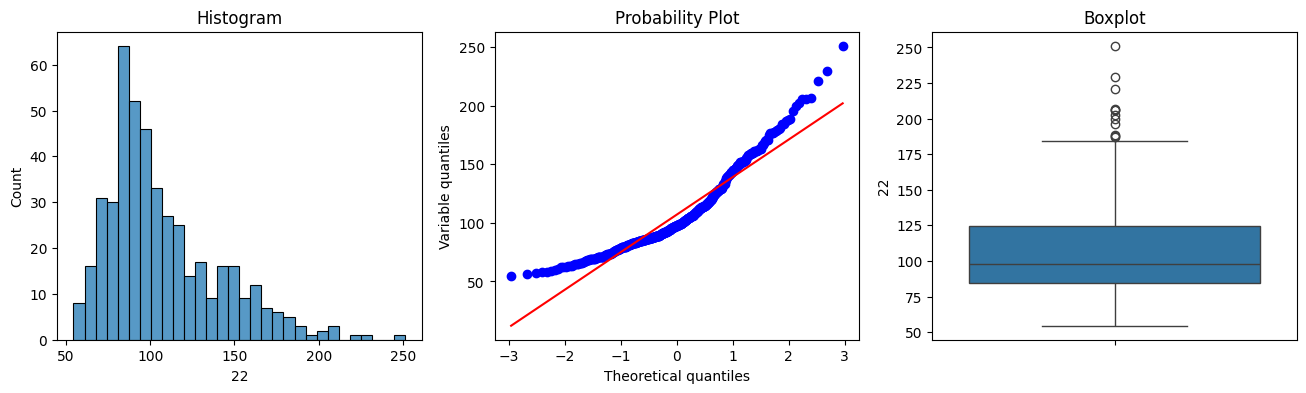

23


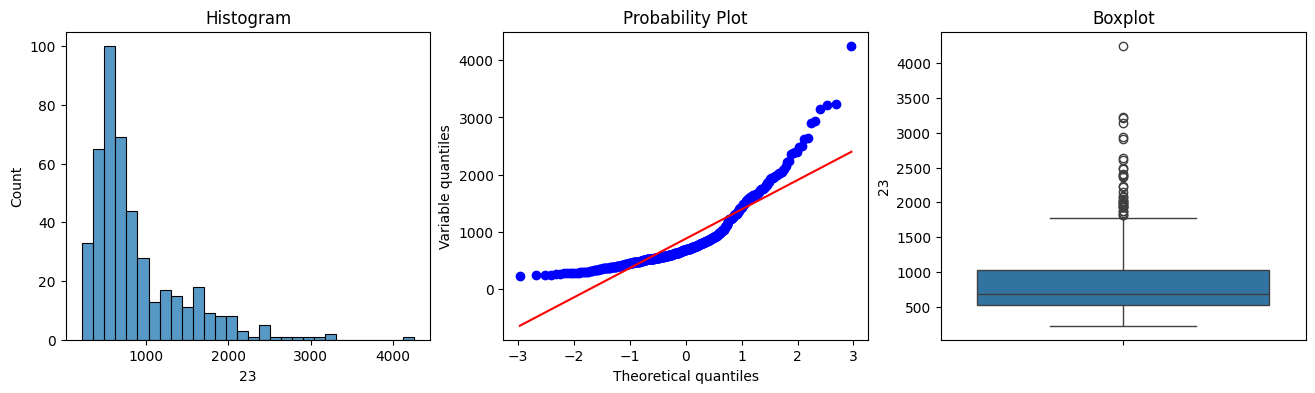

24


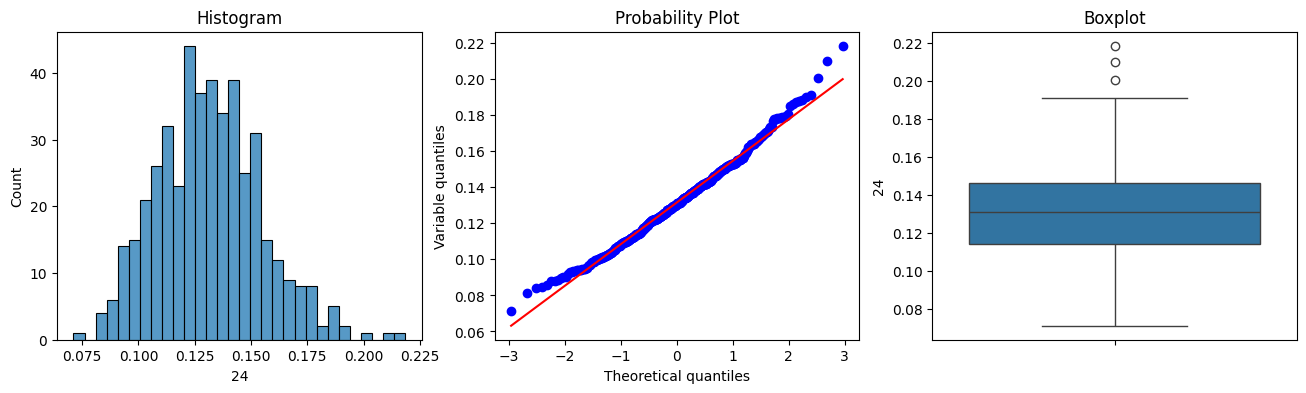

25


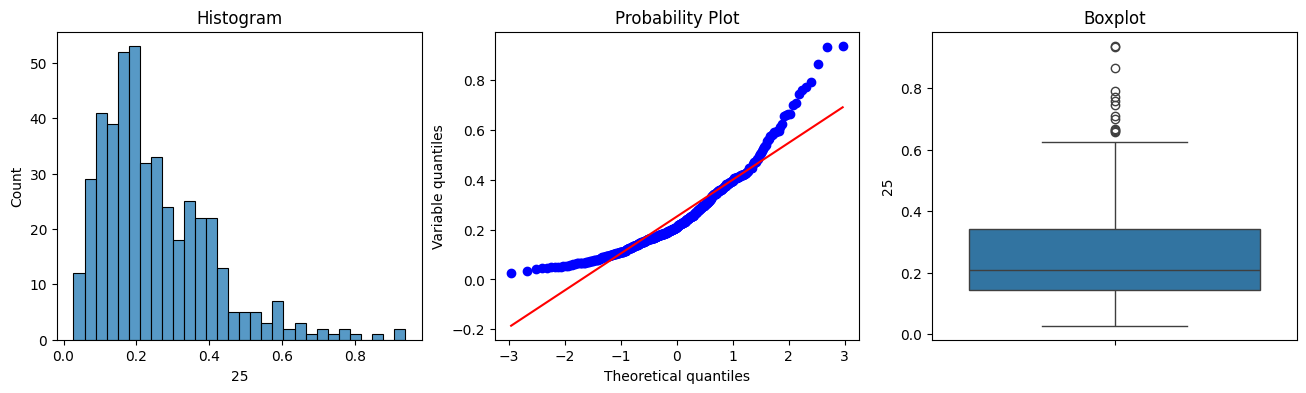

26


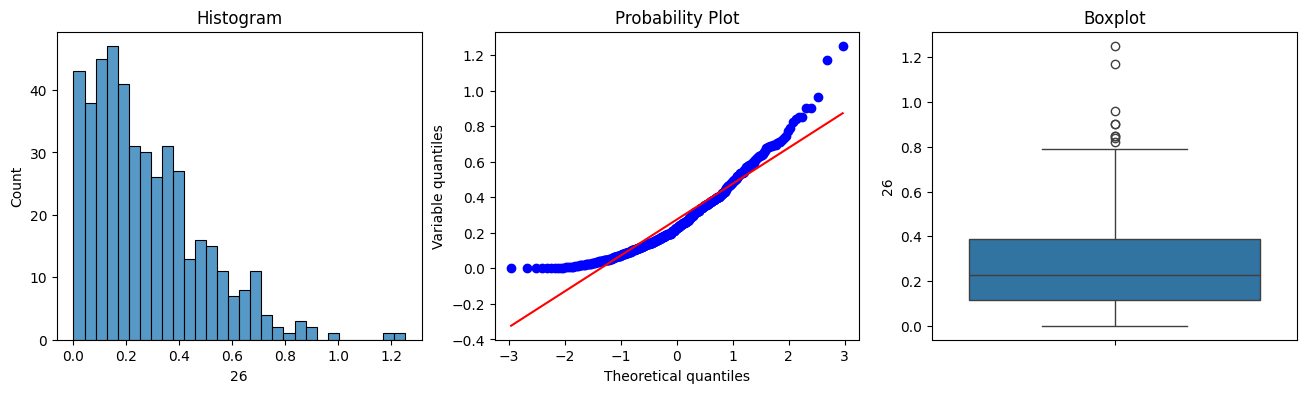

27


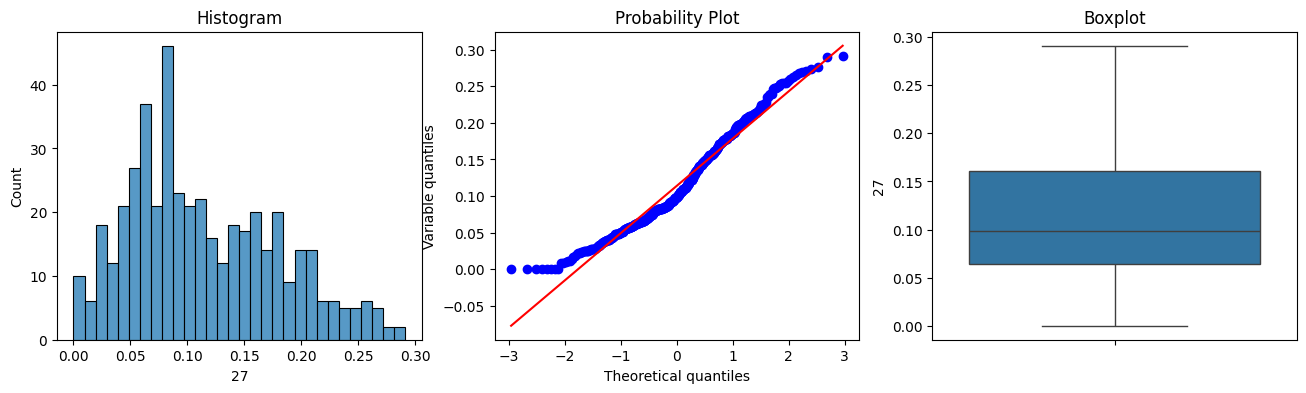

28


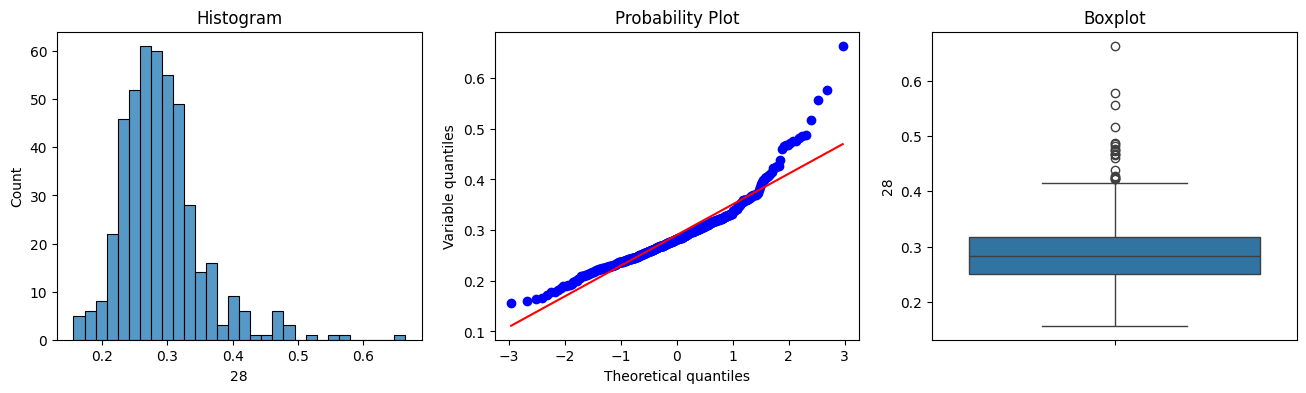

29


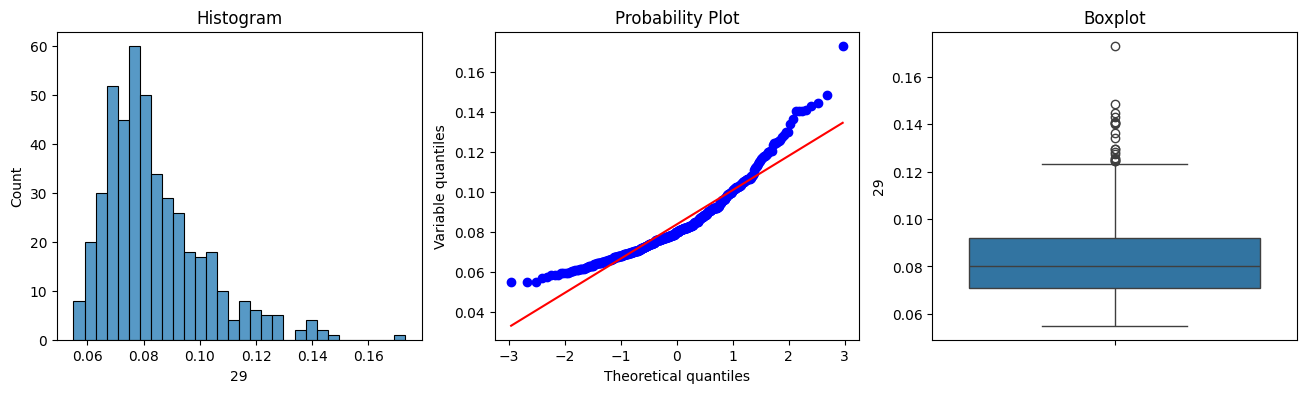

In [ ]:
for column in X_train.columns:
  print(column)
  check_plot(X_train, column)


Conclusion grafik:
1. Terdapat Outlier hampir di semua kolom, kecuali kolom 27, kemudian kita akan melakukan handling outlier seperti pada step berikut.
2. Dengan menangani outlier, kita dapat mengurangi potensi distorsi dan variabilitas yang tidak diinginkan dalam data, meningkatkan akurasi, dan membuat model yang lebih baik dalam memprediksi atau mengelompokkan data baru.

In [ ]:
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
columns_with_outliers = [i for i in range(0, 30) if i != 27]

# Proses handling outlier dengan perulangan
for col in columns_with_outliers:
    upper_limit, lower_limit = find_outlier_boundary(X_train, col)
    X_train[col] = np.where(X_train[col] > upper_limit, upper_limit,
                            np.where(X_train[col] < lower_limit, lower_limit, X_train[col]))

0


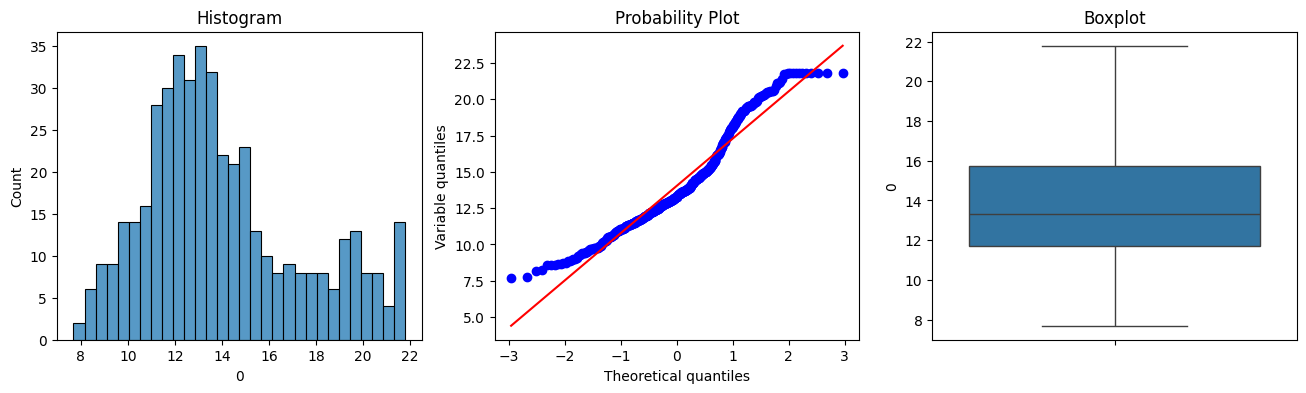

1


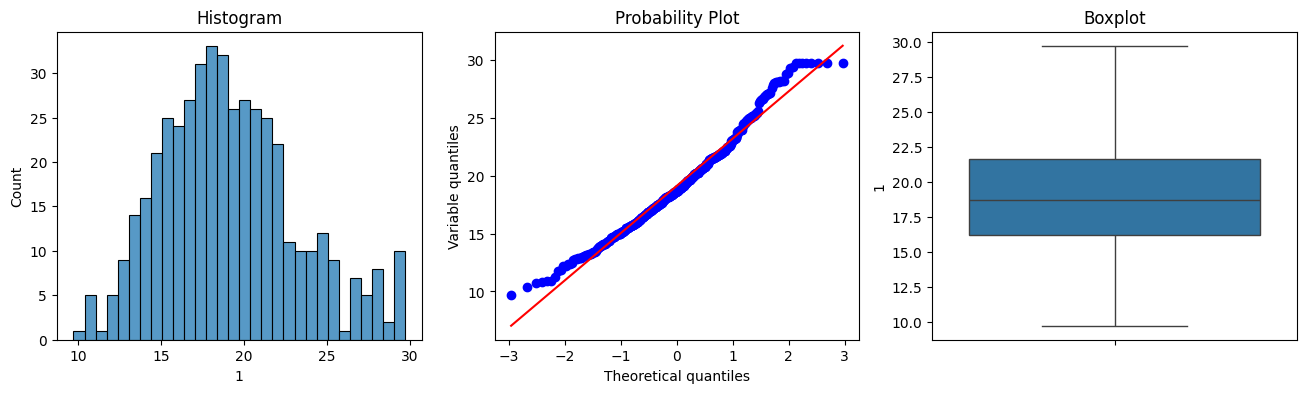

2


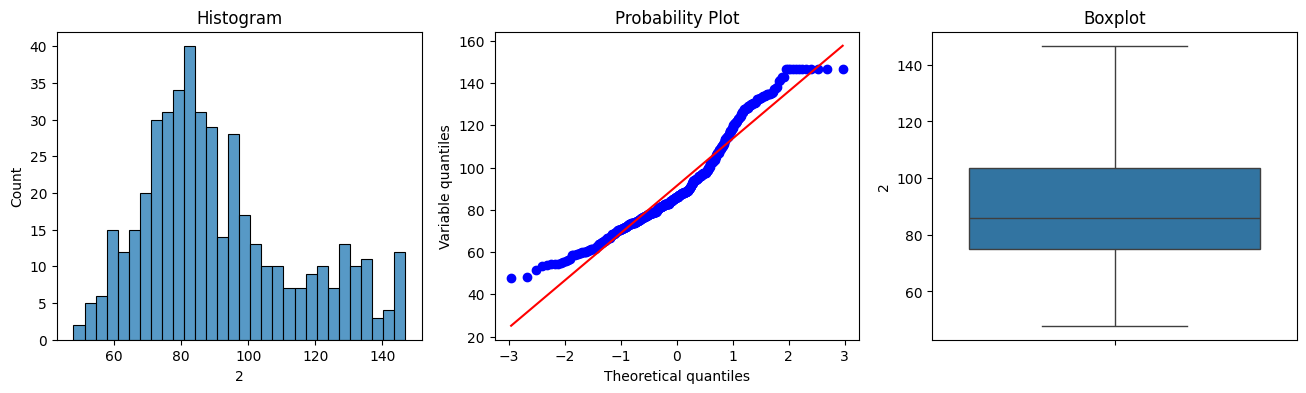

3


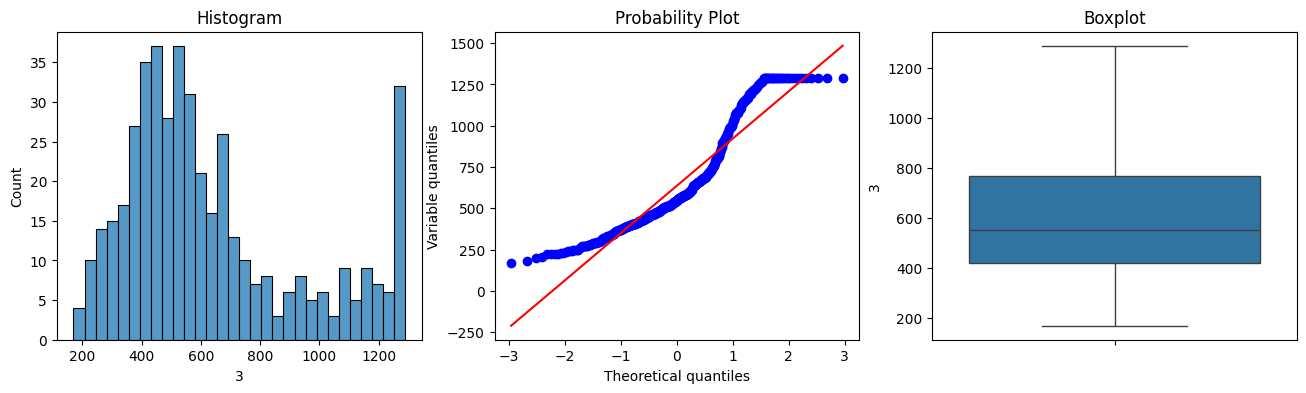

4


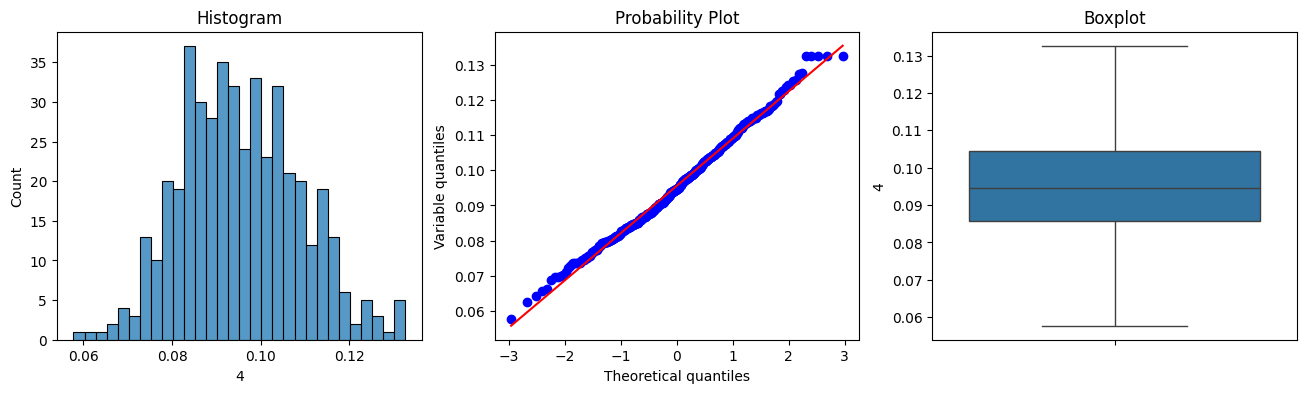

5


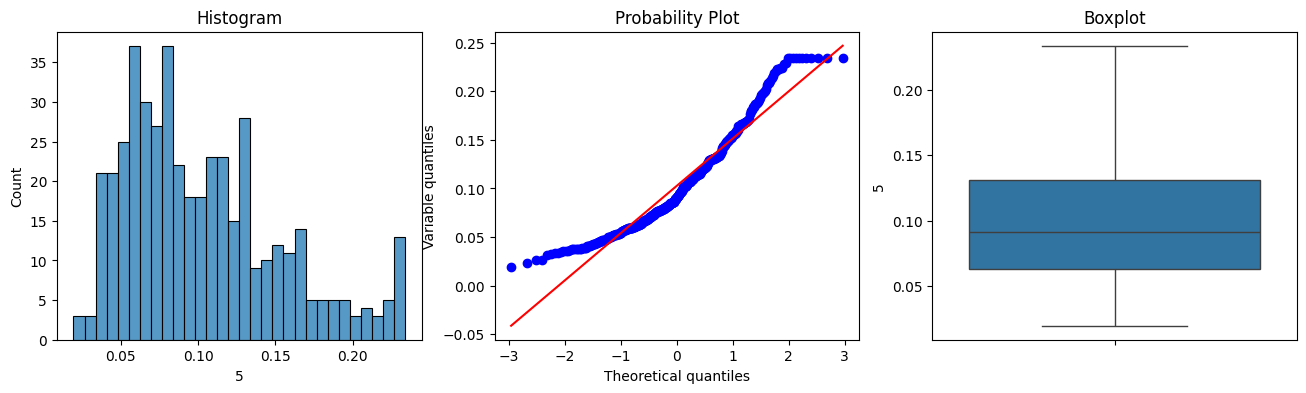

6


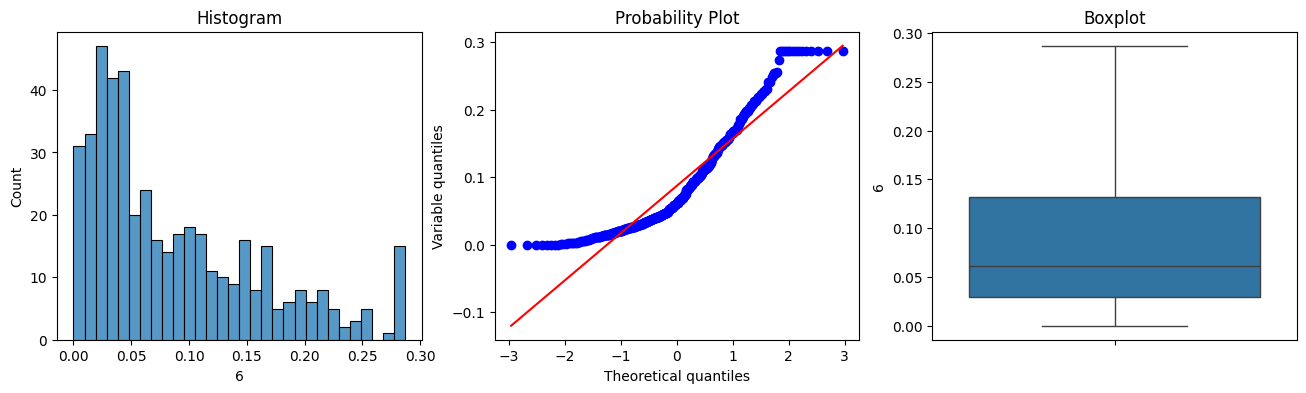

7


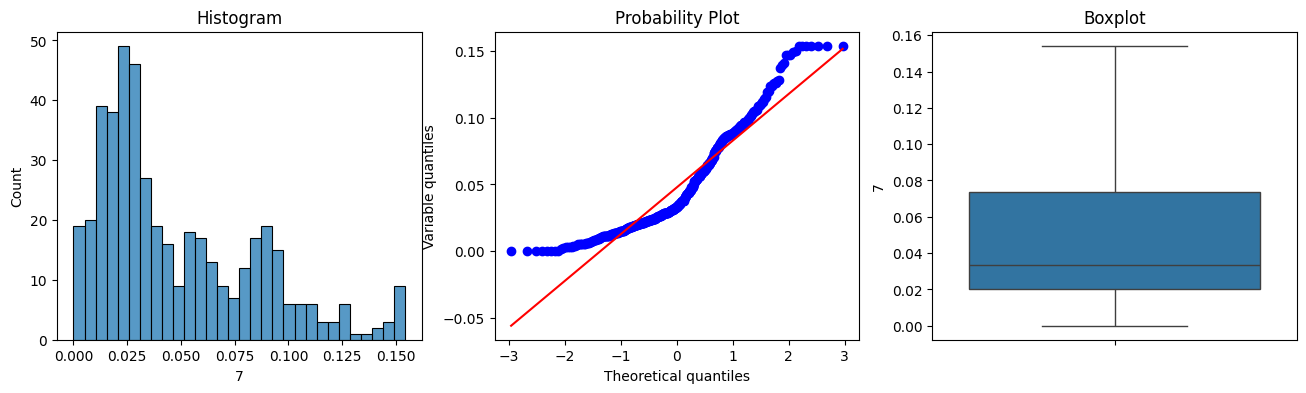

8


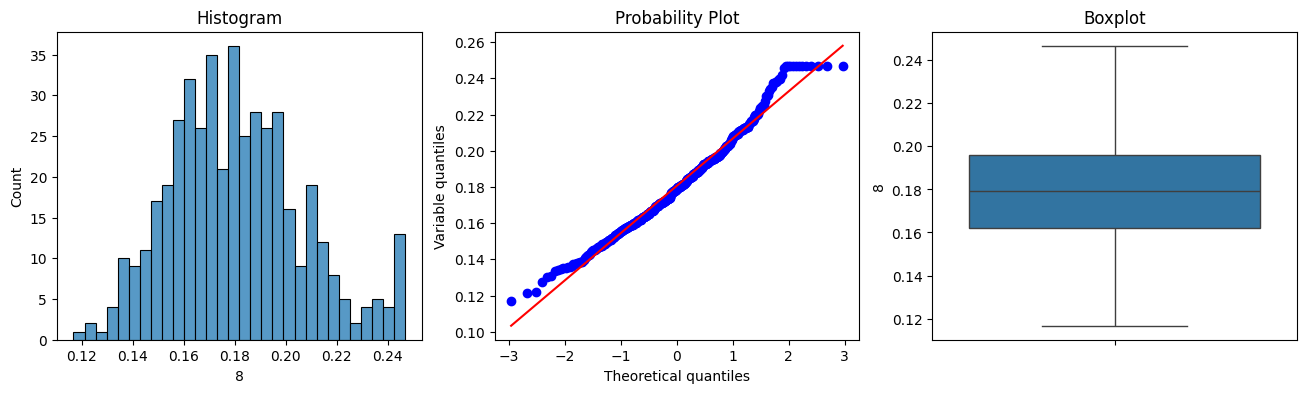

9


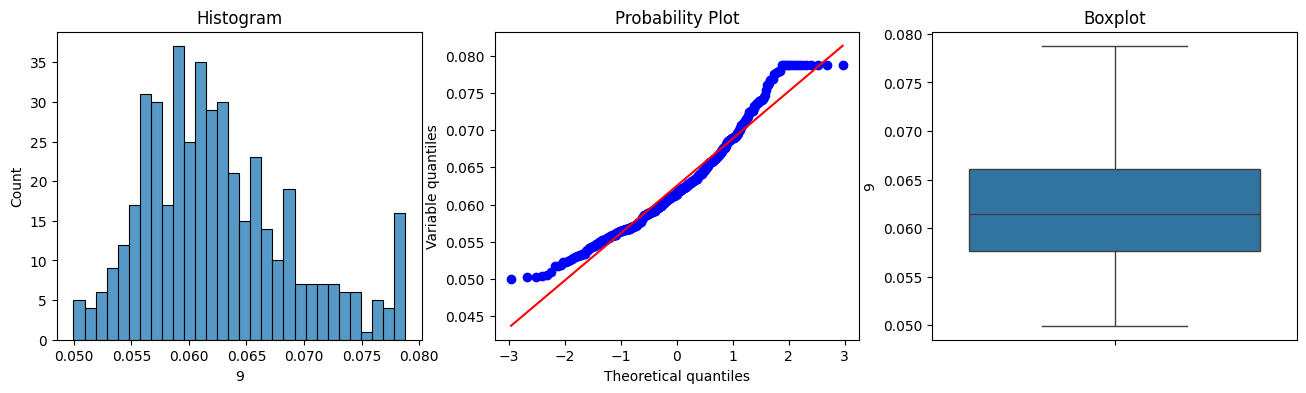

10


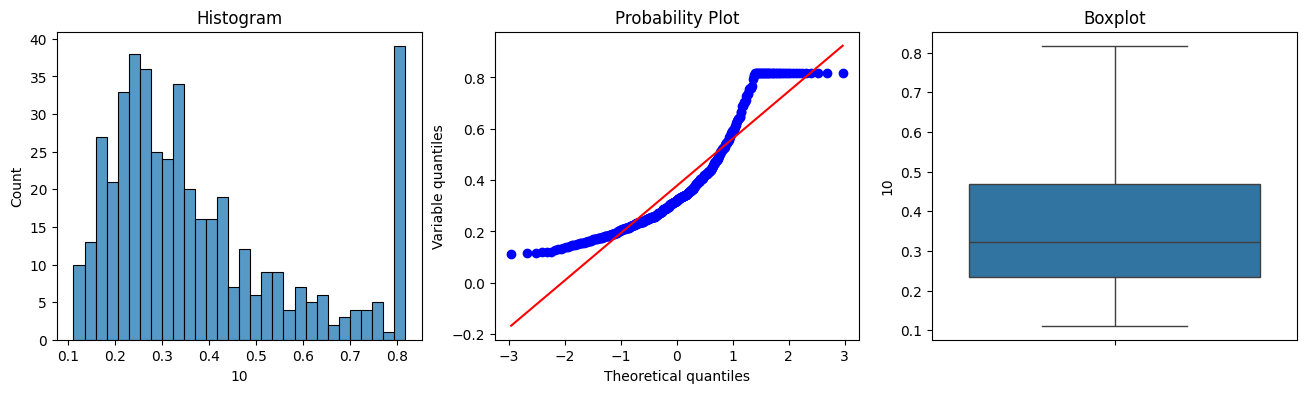

11


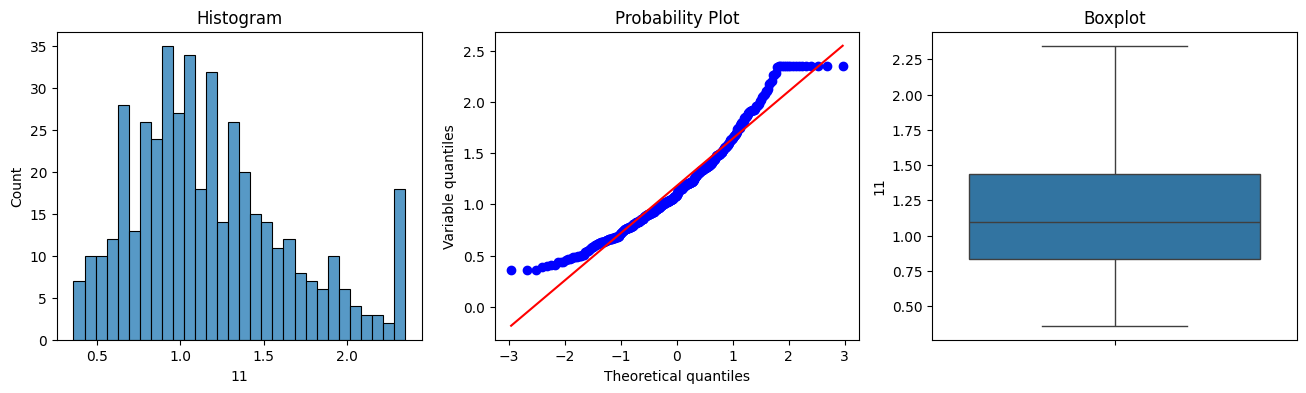

12


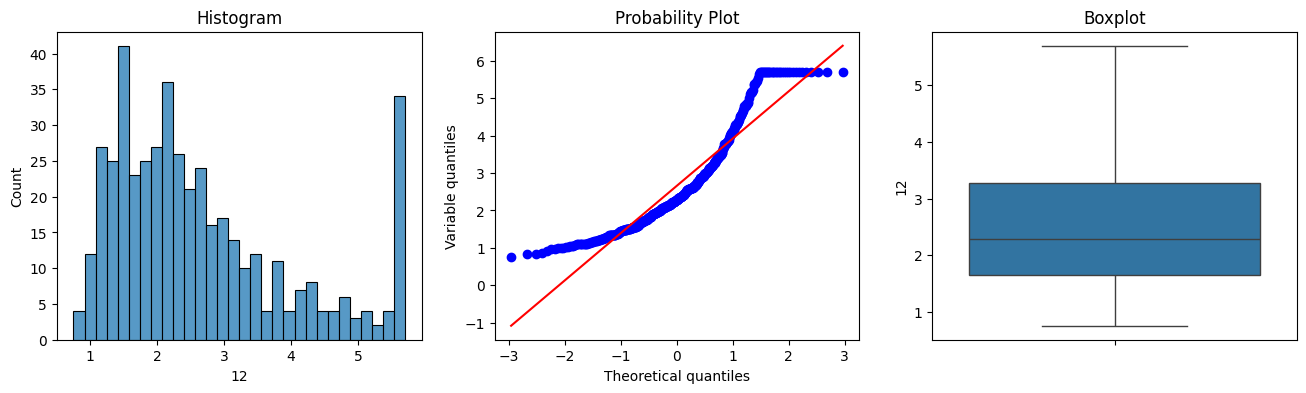

13


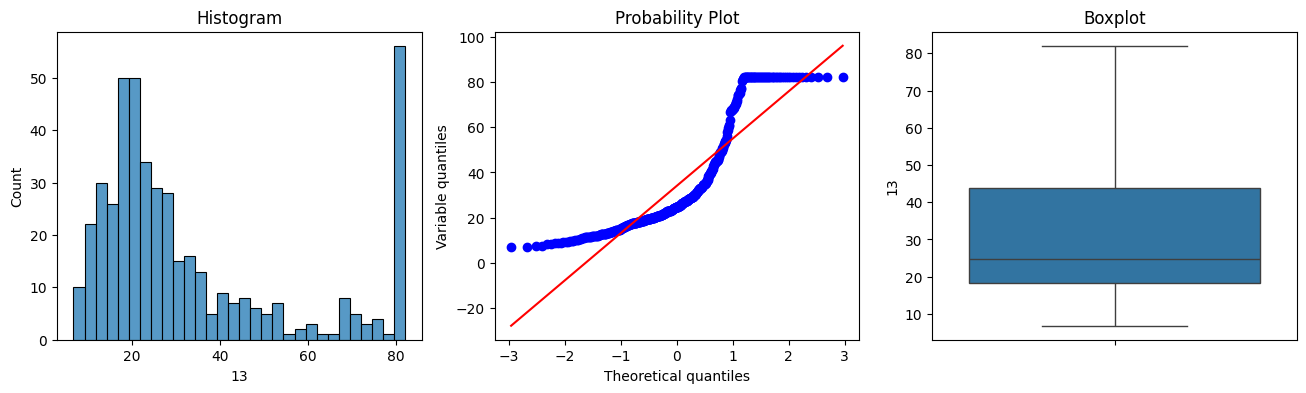

14


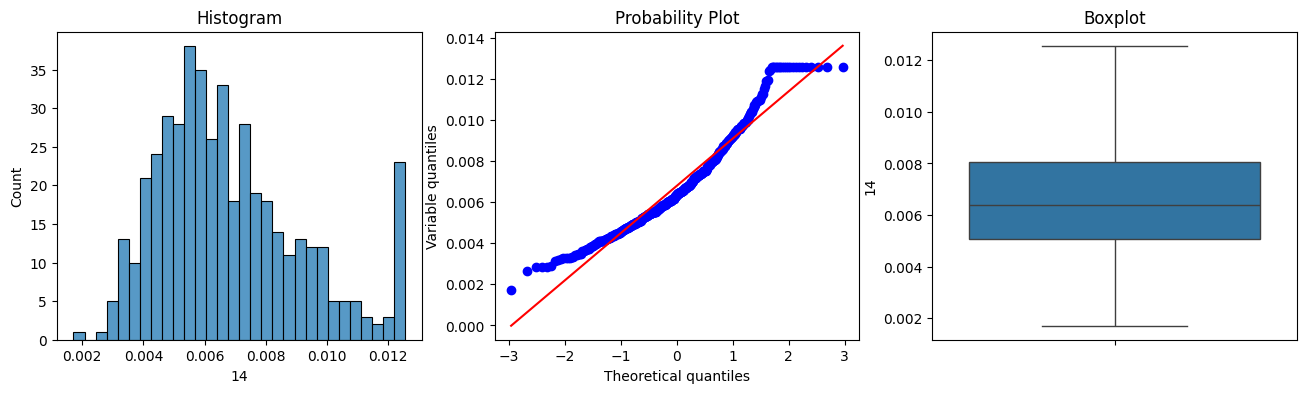

15


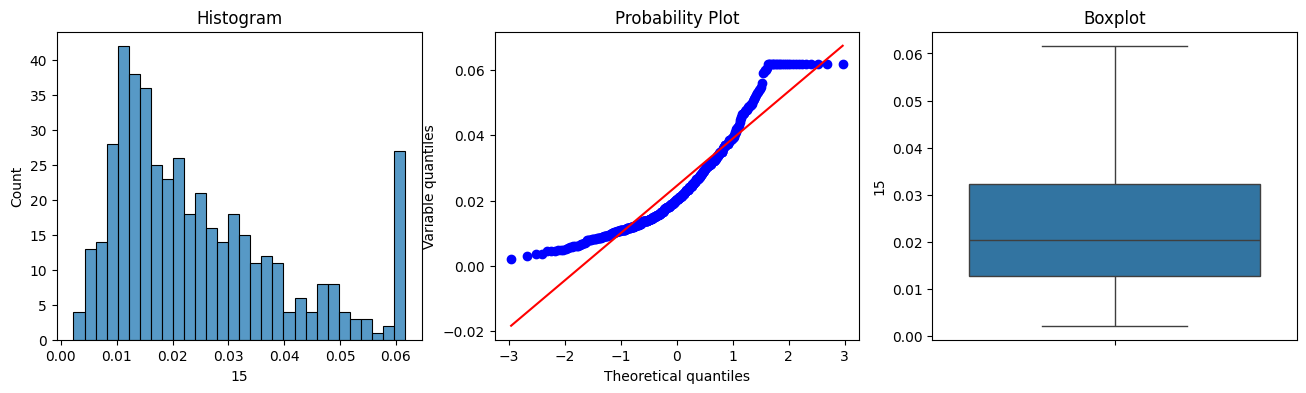

16


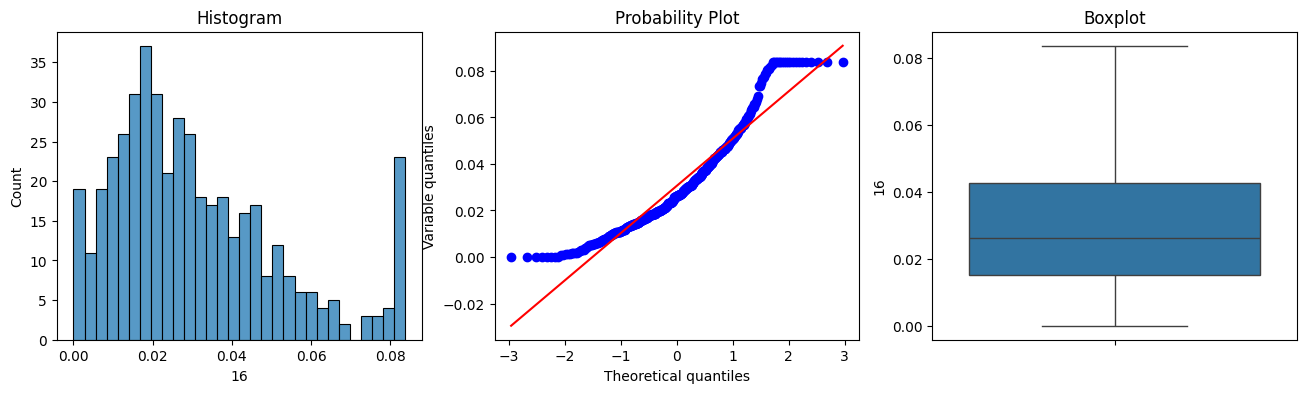

17


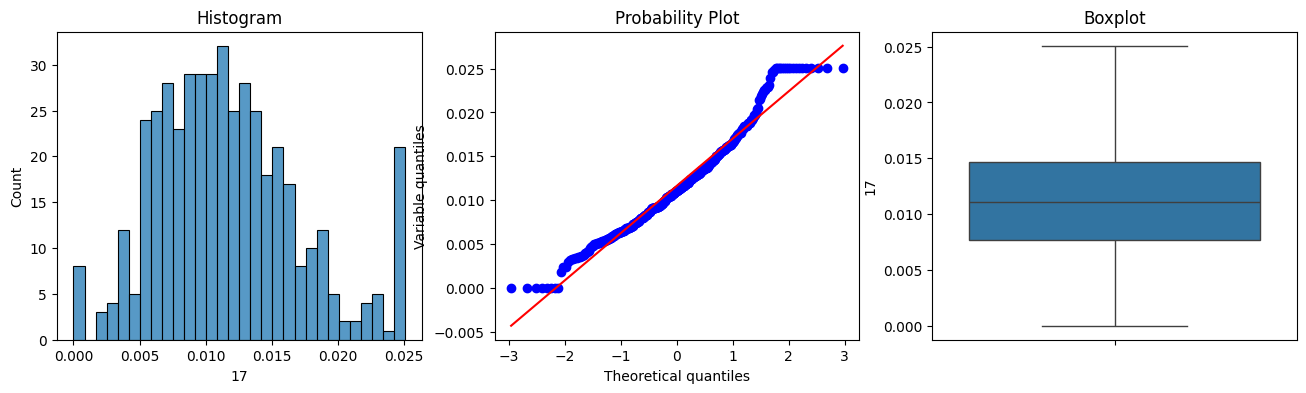

18


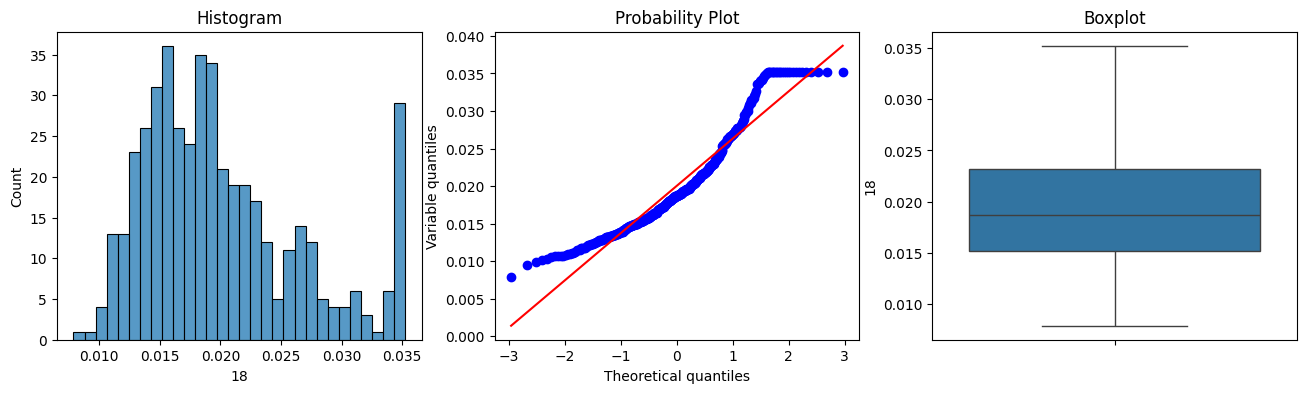

19


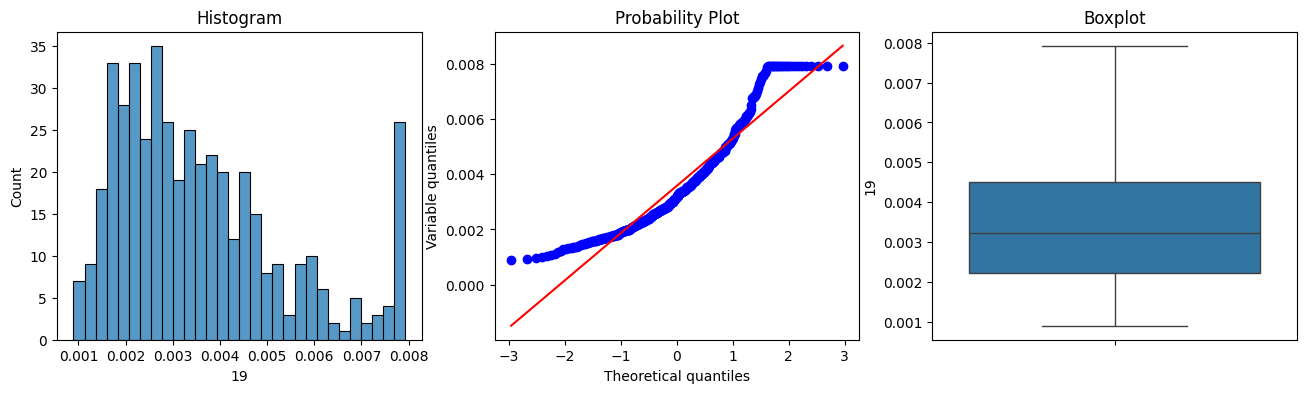

20


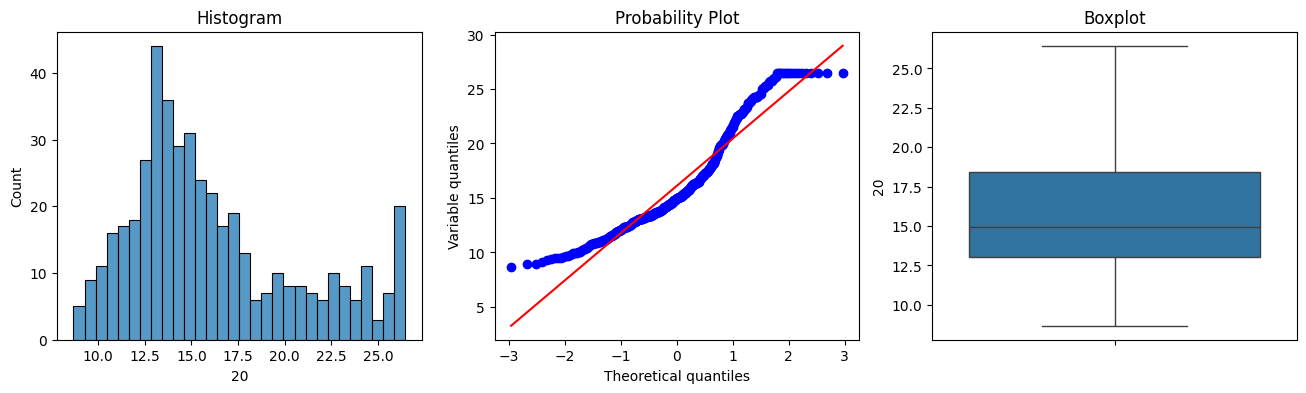

21


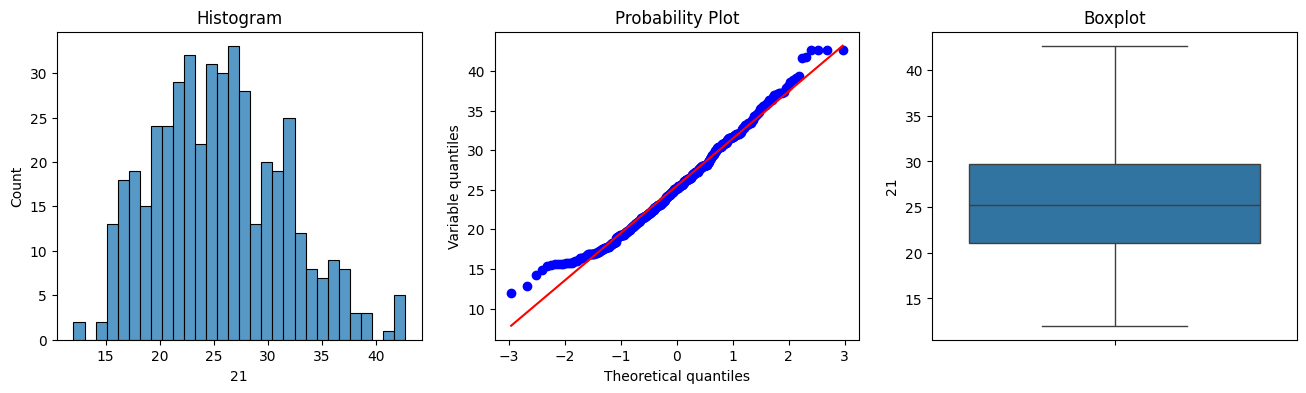

22


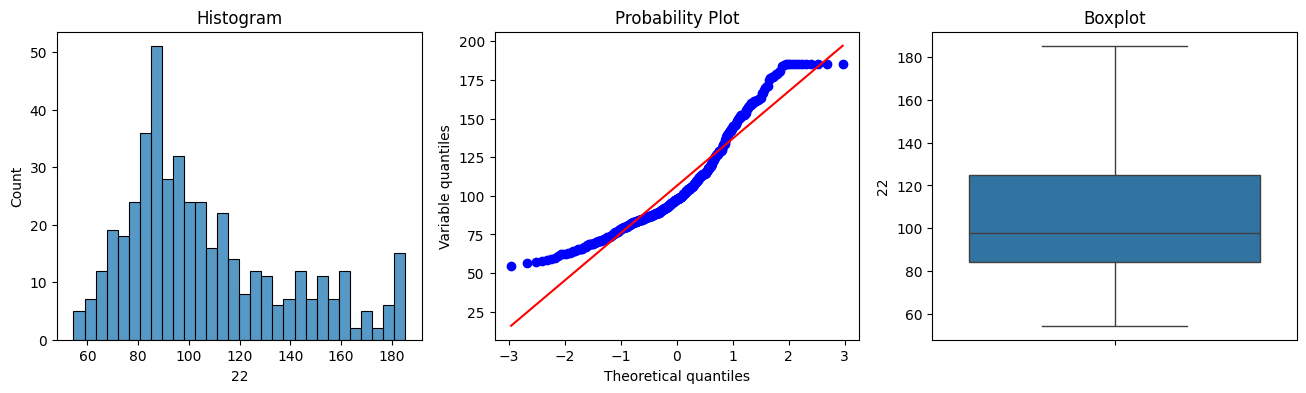

23


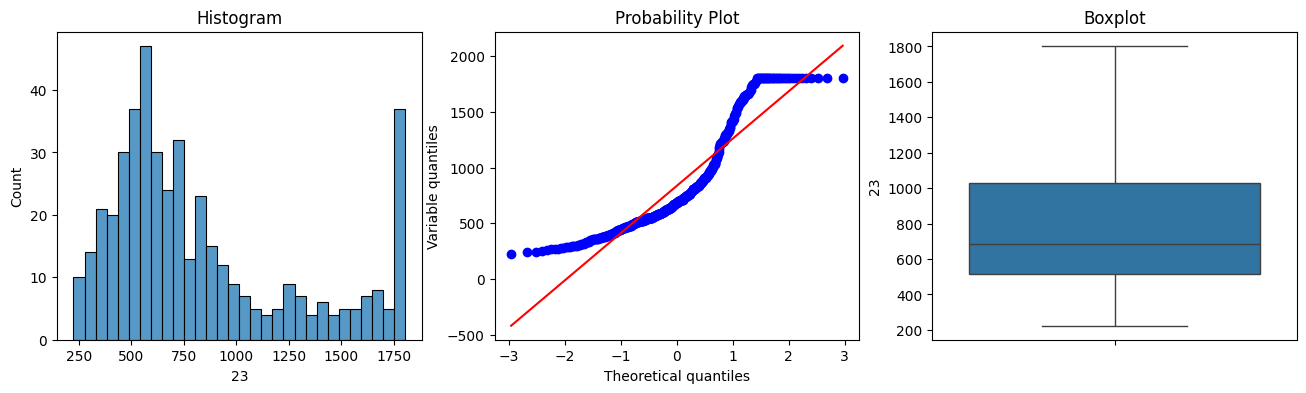

24


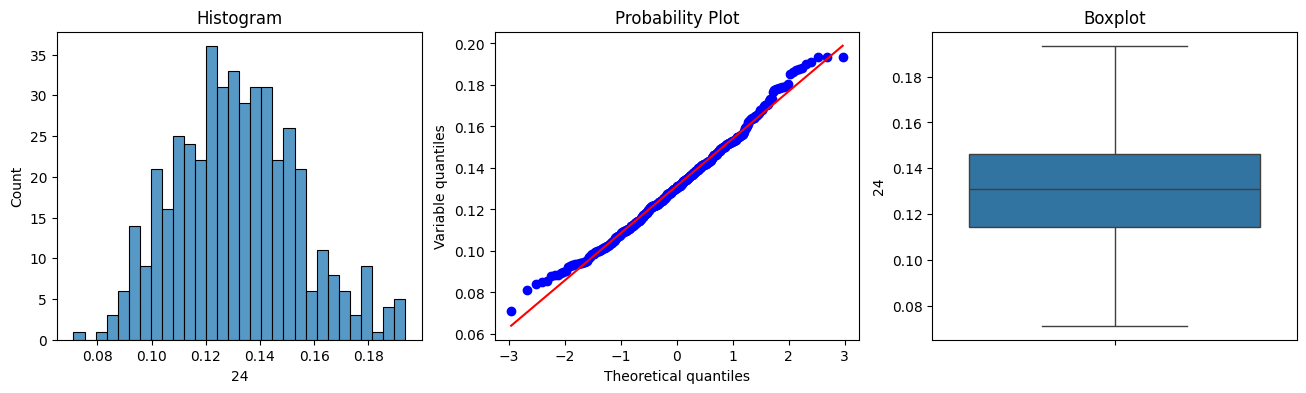

25


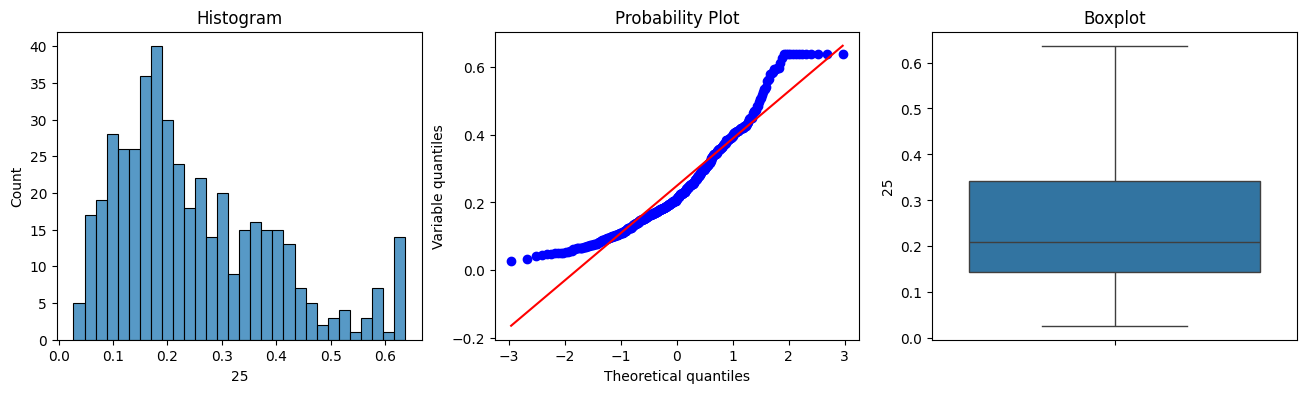

26


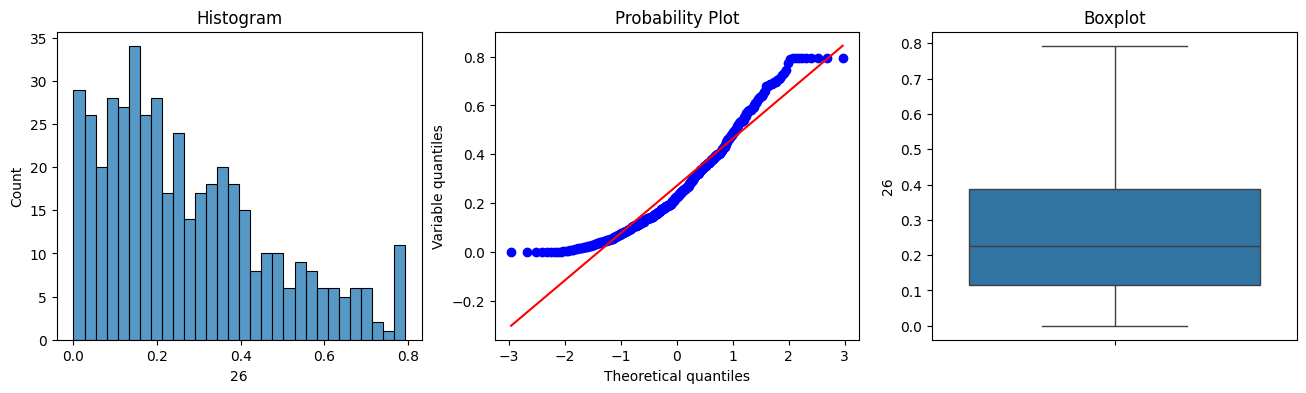

27


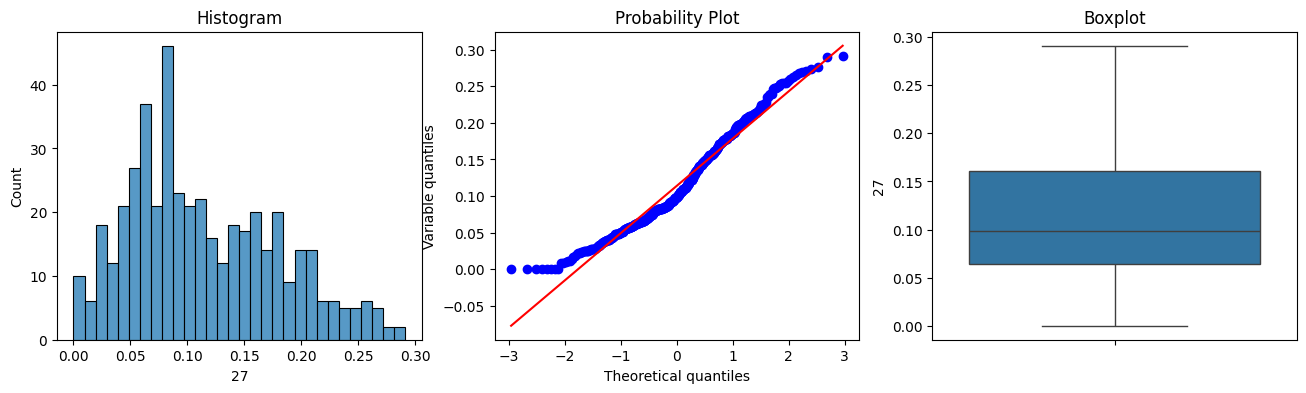

28


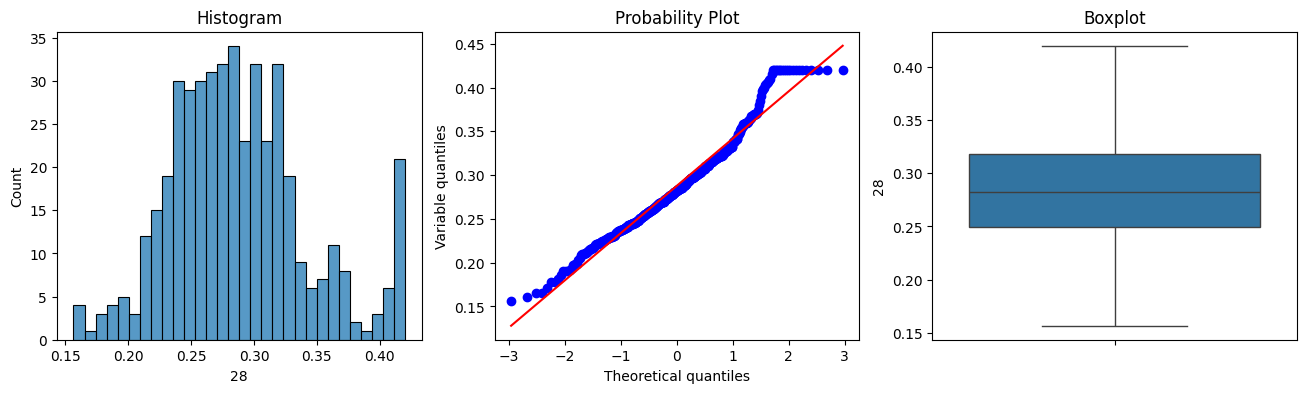

29


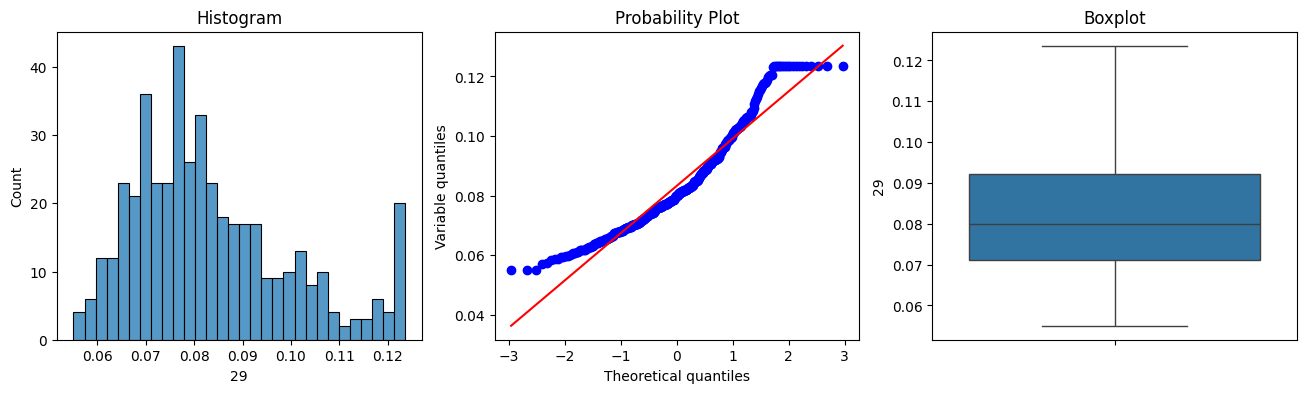

In [ ]:
for column in X_train.columns:
  print(column)
  check_plot(X_train, column)

Conclusion Grafik setelah handling outlier:
1. Sudah tidak terdapat outlier pada semua kolom sehingga dapat lanjut ke proses selanjutnya.

In [ ]:
# Memeriksa missing values
missing_values = X.isnull().sum()
print("Missing Values per Feature:\n", missing_values)

Missing Values per Feature:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64


In [ ]:
for column in X.columns:
    print(f"============= {column} =================")
    display(X[column].value_counts())
    print()

============= 0 =================


,count
0,
12.34,4
11.71,3
12.46,3
13.05,3
10.26,3
...,...
12.23,1
14.45,1
19.18,1



============= 1 =================


,count
1,
20.52,3
16.85,3
16.84,3
19.83,3
14.93,3
...,...
18.58,1
15.11,1
22.41,1



============= 2 =================


,count
2,
82.61,3
87.76,3
134.70,3
93.97,2
82.69,2
...,...
127.50,1
90.63,1
82.53,1



============= 3 =================


,count
3,
512.2,3
1075.0,2
582.7,2
399.8,2
641.2,2
...,...
507.4,1
609.9,1
463.7,1



============= 4 =================


,count
4,
0.10070,5
0.11500,4
0.10540,4
0.10750,4
0.10630,3
...,...
0.08876,1
0.09965,1
0.13230,1



============= 5 =================


,count
5,
0.11470,3
0.12060,3
0.07698,2
0.05743,2
0.03834,2
...,...
0.05562,1
0.06141,1
0.04695,1



============= 6 =================


,count
6,
0.000000,13
0.120400,3
0.111500,2
0.033440,2
0.110300,2
...,...
0.065930,1
0.248700,1
0.287100,1



============= 7 =================


,count
7,
0.00000,13
0.02864,3
0.14710,2
0.05778,2
0.02272,2
...,...
0.02361,1
0.05189,1
0.14960,1



============= 8 =================


,count
8,
0.1714,4
0.1769,4
0.1893,4
0.1601,4
0.1717,4
...,...
0.2251,1
0.2200,1
0.1979,1



============= 9 =================


,count
9,
0.06113,3
0.05913,3
0.05907,3
0.05667,3
0.06782,3
...,...
0.05234,1
0.06323,1
0.08116,1



============= 10 =================


,count
10,
0.2860,3
0.2204,3
0.2684,2
0.2239,2
0.1601,2
...,...
0.6298,1
0.8361,1
0.2889,1



============= 11 =================


,count
11,
1.1500,3
1.3500,3
1.2680,3
0.8561,3
1.0160,2
...,...
0.7655,1
0.4757,1
0.4956,1



============= 12 =================


,count
12,
1.778,4
1.243,2
2.569,2
2.183,2
3.008,2
...,...
2.112,1
1.687,1
1.011,1



============= 13 =================


,count
13,
16.97,3
17.67,3
16.64,3
18.54,3
20.98,2
...,...
26.43,1
22.77,1
40.98,1



============= 14 =================


,count
14,
0.006399,2
0.010520,2
0.012910,2
0.007189,2
0.005298,2
...,...
0.006905,1
0.002866,1
0.014390,1



============= 15 =================


,count
15,
0.01812,3
0.02310,3
0.01104,3
0.02431,2
0.01203,2
...,...
0.01200,1
0.03728,1
0.02263,1



============= 16 =================


,count
16,
0.000000,13
0.016520,2
0.016980,2
0.026810,2
0.035760,2
...,...
0.015560,1
0.019780,1
0.001597,1



============= 17 =================


,count
17,
0.00000,13
0.01167,3
0.01110,3
0.01499,3
0.01004,2
...,...
0.00842,1
0.01883,1
0.01321,1



============= 18 =================


,count
18,
0.01344,4
0.02045,3
0.01884,3
0.01647,3
0.01870,3
...,...
0.02538,1
0.01172,1
0.01613,1



============= 19 =================


,count
19,
0.004005,2
0.003224,2
0.004560,2
0.005667,2
0.001892,2
...,...
0.001988,1
0.001671,1
0.001087,1



============= 20 =================


,count
20,
12.360,5
13.340,4
13.500,4
12.840,3
15.140,3
...,...
15.740,1
11.870,1
17.800,1



============= 21 =================


,count
21,
27.26,3
17.70,3
16.93,2
30.50,2
23.17,2
...,...
32.06,1
24.70,1
22.00,1



============= 22 =================


,count
22,
117.70,3
105.90,3
101.70,3
184.60,2
106.40,2
...,...
79.57,1
84.42,1
139.20,1



============= 23 =================


,count
23,
472.4,2
1210.0,2
826.4,2
402.8,2
1750.0,2
...,...
579.5,1
762.4,1
521.5,1



============= 24 =================


,count
24,
0.13470,4
0.12750,4
0.12230,4
0.14010,4
0.12340,4
...,...
0.22260,1
0.13810,1
0.14290,1



============= 25 =================


,count
25,
0.34160,3
0.14860,3
0.21700,2
0.09866,2
0.22640,2
...,...
0.24450,1
0.10190,1
0.32990,1



============= 26 =================


,count
26,
0.00000,13
0.45040,3
0.13770,3
0.18040,2
0.18110,2
...,...
0.00692,1
0.16480,1
0.29020,1



============= 27 =================


,count
27,
0.00000,13
0.05556,3
0.06296,3
0.12180,3
0.07431,3
...,...
0.15410,1
0.29030,1
0.26880,1



============= 28 =================


,count
28,
0.2226,3
0.2369,3
0.2972,3
0.3196,3
0.3109,3
...,...
0.3024,1
0.3000,1
0.3215,1



============= 29 =================


,count
29,
0.07427,3
0.09026,2
0.12970,2
0.08174,2
0.10550,2
...,...
0.06938,1
0.07697,1
0.09772,1


In [ ]:
# Mengecek kolom dengan value_counts() <= 0 atau yang memiliki nilai NaN
for column in X.columns:
    # Menghitung value counts dan jumlah NaN
    value_counts = X[column].value_counts(dropna=False)
    nan_count = X[column].isna().sum()

    # Memeriksa kondisi apakah ada nilai dengan value_counts <= 0 atau NaN
    if (value_counts <= 0).any() or nan_count > 0:
        print(f"============= {column} =================")

        # Menampilkan value counts yang <= 0 dan NaN jika ada
        display(value_counts[value_counts <= 0])

        # Jika ada NaN, tampilkan informasi mengenai jumlah NaN
        if nan_count > 0:
            print(f"Jumlah nilai NaN di kolom {column}: {nan_count}")
        print()
    else:
        print(f"Tidak ada missing value di kolom {column}")


Tidak ada missing value di kolom 0
Tidak ada missing value di kolom 1
Tidak ada missing value di kolom 2
Tidak ada missing value di kolom 3
Tidak ada missing value di kolom 4
Tidak ada missing value di kolom 5
Tidak ada missing value di kolom 6
Tidak ada missing value di kolom 7
Tidak ada missing value di kolom 8
Tidak ada missing value di kolom 9
Tidak ada missing value di kolom 10
Tidak ada missing value di kolom 11
Tidak ada missing value di kolom 12
Tidak ada missing value di kolom 13
Tidak ada missing value di kolom 14
Tidak ada missing value di kolom 15
Tidak ada missing value di kolom 16
Tidak ada missing value di kolom 17
Tidak ada missing value di kolom 18
Tidak ada missing value di kolom 19
Tidak ada missing value di kolom 20
Tidak ada missing value di kolom 21
Tidak ada missing value di kolom 22
Tidak ada missing value di kolom 23
Tidak ada missing value di kolom 24
Tidak ada missing value di kolom 25
Tidak ada missing value di kolom 26
Tidak ada missing value di kolom 27
Ti

Conclusion Check Missing Value:
1. Tidak terdapat missing value di semua kolom pada data
2. Cek missing value membantu memastikan bahwa data lengkap, berkualitas, dan siap untuk dianalisis atau dimasukkan ke dalam model. Tanpa menangani missing values, kita berisiko mendapatkan hasil analisis yang salah, model yang kurang akurat, atau bahkan error dalam proses analisis atau pelatihan model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
minmax = MinMaxScaler()

# Terapkan MinMaxScaler pada X_train
X_train_scaled = minmax.fit_transform(X_train)

# Terapkan MinMaxScaler pada X_test menggunakan parameter dari X_train
X_test_scaled = minmax.transform(X_test)

# Mengubah hasilnya menjadi DataFrame kembali
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Conclusion:
1. MinMaxScaler adalah alat yang berguna untuk mengubah skala data, memastikan bahwa setiap fitur berada dalam rentang yang sama. Hal Ini sangat bermanfaat dalam mempercepat pelatihan model, meningkatkan stabilitas algoritma berbasis jarak, serta mencegah bias dalam model machine learning.

In [ ]:
X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.450568,0.471329,0.439992,0.417070,0.505824,0.388932,0.303895,0.310572,0.492017,0.436112,...,0.418961,0.440289,0.398051,0.388287,0.492470,0.364314,0.342292,0.392379,0.498189,0.412997
std,0.235896,0.205312,0.231554,0.269099,0.179355,0.233223,0.257885,0.238651,0.201647,0.223897,...,0.252943,0.195156,0.242312,0.286525,0.185935,0.235864,0.251228,0.224488,0.206883,0.237664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.284651,0.323040,0.275087,0.223494,0.375000,0.202811,0.102198,0.131883,0.347241,0.266632,...,0.246390,0.294574,0.227644,0.185292,0.353316,0.193112,0.146941,0.219691,0.352774,0.233518
50%,0.397759,0.448556,0.385203,0.341010,0.492423,0.333698,0.214504,0.216628,0.480677,0.399688,...,0.354190,0.430845,0.330242,0.292950,0.488170,0.300040,0.285435,0.338866,0.478710,0.364936
75%,0.570790,0.593824,0.565052,0.534096,0.625000,0.521686,0.461319,0.479130,0.608345,0.559979,...,0.547834,0.576744,0.536586,0.511175,0.611990,0.515867,0.488165,0.553608,0.611664,0.540111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Baseline Modelling + Evaluasi dan bandingkan performanya. Lalu pilih model yang ingin di improve dengan teknik tunning serta berikan alasannya dalam membandingkan model dan memilih model

In [ ]:
#evaluation model roc auc
from sklearn.metrics import roc_auc_score

#### K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Prediksi probabilitas untuk ROC AUC
y_train_knn_pred = knn_model.predict_proba(X_train)[:, 1]
y_test_knn_pred = knn_model.predict_proba(X_test)[:, 1]

# Hitung ROC AUC
roc_auc_train_knn = roc_auc_score(y_train, y_train_knn_pred)
roc_auc_test_knn = roc_auc_score(y_test, y_test_knn_pred)

print("KNN ROC AUC on training set:", roc_auc_train_knn)
print("KNN ROC AUC on testing set:", roc_auc_test_knn)

KNN ROC AUC on training set: 0.9882794720072827
KNN ROC AUC on testing set: 0.9959056665574845


#### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi probabilitas untuk ROC AUC
y_train_nb_pred = nb_model.predict_proba(X_train)[:, 1]
y_test_nb_pred = nb_model.predict_proba(X_test)[:, 1]

# Hitung ROC AUC
roc_auc_train_nb = roc_auc_score(y_train, y_train_nb_pred)
roc_auc_test_nb = roc_auc_score(y_test, y_test_nb_pred)

print("Naive Bayes ROC AUC on training set:", roc_auc_train_nb)
print("Naive Bayes ROC AUC on testing set:", roc_auc_test_nb)


Naive Bayes ROC AUC on training set: 0.9860553647535897
Naive Bayes ROC AUC on testing set: 0.9980347199475925


Conclusion Baseline Model :
1. Hasil pengukuran ROC AUC pada kedua baseline tersebut sudah bagus tidak overfit(selisih data train dan data test lebih dari 10%) ataupun underfit(data tidak belajar dengan baik pada data train)
2. Dari hasil diatas, kita bisa peroleh bahwasanya yang bisa kita **improve** (performance Hyperparameter tunning) lagi ialah **KNN** karena performance pada data test sedikit kurang bagus jika dibandingkan dengan Naive Bayes.

KNN DOCS PARAMETER

https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### 3. Lakukan teknik-teknik Hyperparameter Tunning

####Grid Search

In [ ]:
# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Definisikan parameter grid untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Jumlah tetangga yang berbeda untuk dicoba
    'weights': ['uniform', 'distance'],  # Metode pembobotan jarak
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Metrik jarak
}

# Set up grid search untuk KNN
search_knn = GridSearchCV(knn, param_grid_knn, scoring='roc_auc', cv=5)

# Pastikan y_train menjadi array 1D menggunakan .ravel()
search_knn.fit(X_train, y_train.values.ravel())


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [ ]:
# best performance tunning

search_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
# Get the best hyperparameters and retrain the model
best_params = search_knn.best_params_
knn_grid_best = KNeighborsClassifier(**best_params)
knn_grid_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [ ]:
# Evaluasi hasil KNN yang telah dilakukan Grid Search Tunning
# Predict probabilities for the training and testing data
y_train_knn_prob = knn_grid_best.predict_proba(X_train)[:, 1]
y_test_knn_prob = knn_grid_best.predict_proba(X_test)[:, 1]

# Calculate ROC AUC scores for training and testing data
roc_auc_train_knn = roc_auc_score(y_train, y_train_knn_prob)
roc_auc_test_knn = roc_auc_score(y_test, y_test_knn_prob)

print("KNN ROC AUC on training set:", roc_auc_train_knn)
print("KNN ROC AUC on testing set:", roc_auc_test_knn)

KNN ROC AUC on training set: 1.0
KNN ROC AUC on testing set: 0.9977071732721913


CONCLUSION GRID SEARCH:
1. Setelah dilakukan grid search pada KNN kita peroleh performa model sebelum gridsearch tunning dan setelah gridsearch tunning :
2. Sebelum Tunning GridSearch : K Nearest Neighbor ROC AUC on training set: 0.9882, K Nearest Neighbor ROC AUC on testing set: 0.9959
3. **Setelah Tunning GridSearch : K Nearest Neighbor ROC AUC on training set: 1.0, K Nearest Neighbor ROC AUC on testing set: 0.9977**
4. Dapat dilihat performa ROC AUC pada data Test meningkat setelah dilakukan tunning dengan teknik Grid Search.

####Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Parameter yang akan diuji dalam Randomized Search
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Variasi jumlah tetangga
    'weights': ['uniform', 'distance'],  # Pembobotan jarak
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Metrik jarak
}

# Inisialisasi objek RandomizedSearchCV
knn_random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist_knn, n_iter=10, cv=5, scoring='roc_auc')

# Pastikan y_train berbentuk 1D dengan .values.ravel() jika y_train adalah DataFrame
knn_random_search.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc')

In [ ]:
# Dapatkan parameter terbaik
knn_best_params = knn_random_search.best_params_

# Buat model terbaik dengan parameter terbaik
knn_best_random = KNeighborsClassifier(**knn_best_params)

# Latih model terbaik pada data pelatihan
knn_best_random.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [ ]:
# Evaluasi model terbaik
y_train_knn_pred = knn_best_random.predict_proba(X_train)[:, 1]
y_test_knn_pred = knn_best_random.predict_proba(X_test)[:, 1]

roc_auc_train_knn = roc_auc_score(y_train, y_train_knn_pred)
roc_auc_test_knn = roc_auc_score(y_test, y_test_knn_pred)

print("KNN ROC AUC on training set:", roc_auc_train_knn)
print("KNN ROC AUC on testing set:", roc_auc_test_knn)

KNN ROC AUC on training set: 1.0
KNN ROC AUC on testing set: 0.9963969865705864


Conclusion Random Search Tunning
1. Dengan hasil seperti diatas, hasilnya ialah sedikit lebih tinggi dibandingkan dengan baseline sehingga metode random search diatas masih bisa dipilih sebagai salah satu untuk mencari model yang best seperti pada grid search.
2. Akan tetapi karena hasil yang bisa lebih rendah dibandingkan Grid Search, disarankan menggunakan metode Grid Search saja dibandingkan dengan Random Search.

### 4. Lakukan Learning Curve dan evaluasi dari tiap hasil proses tunning serta berikan kesimpulan dan insight yang telah didapat dari performa model dalam memilih model terbaik.

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

####Learning Curve Baseline Model

In [ ]:
def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()


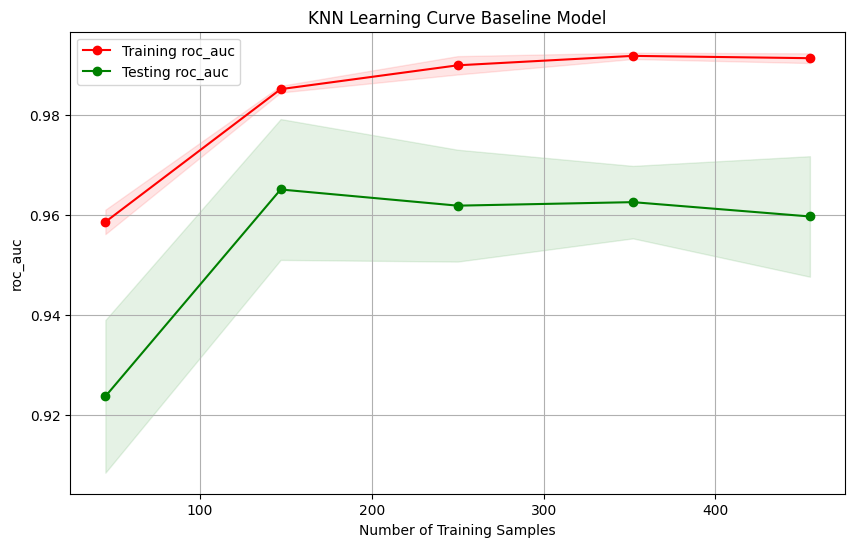

In [ ]:
plot_learning_curve_classification(knn_model, X, y, cv=5, scoring='roc_auc', title="KNN Learning Curve Baseline Model")

Conclusion Hasil baseline diatas :
1. Hasil baseline diatas semakin menuju konvergen (mengerucut dan hampir berhimpit antara training dengan testing) sebelum sampel mencapai sekitar 100-150, tetapi tidak meningkat signifikan ketika lebih banyak data digunakan. Ini menunjukkan bahwa menambah lebih banyak data mungkin tidak akan secara signifikan meningkatkan performa model KNN ini.
2. Namun masih terdapat gap, dan ada indikasi overfit untuk jumlah sampel training yang lebih banyak karena hasil performance pada data test cenderung menurun dengan bertambahnya jumlah sampel setelah sekitar 100-150 sampel.
3. Akan tetapi dengan kondisi yang belum pernah mencapai gap 10% tidak bisa disimpulkan model overfit, maka model ini masih termasuk konvergen dan ideal.

####Learning Curve of Grid Search Best Parameter

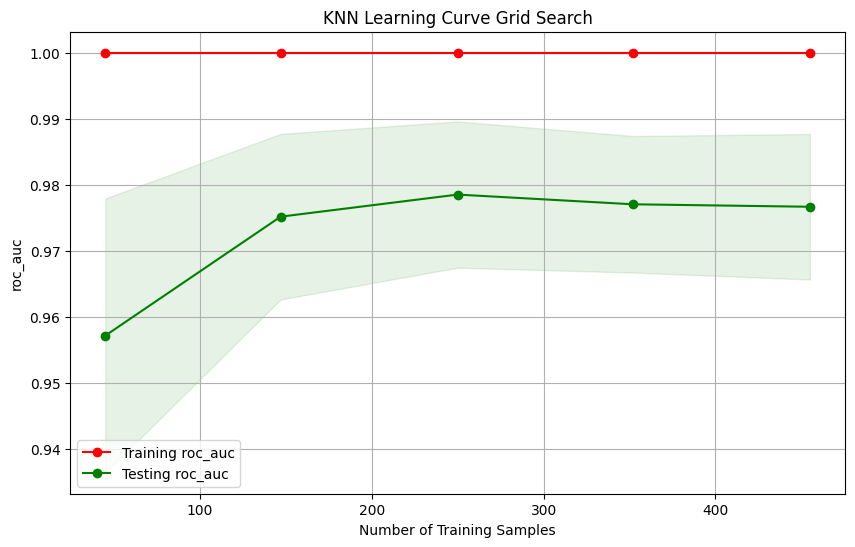

In [ ]:
plot_learning_curve_classification(knn_grid_best, X, y, cv=5, scoring='roc_auc', title="KNN Learning Curve Grid Search")

Conclusion Learning Curve Grid Search:
1. Hasil pada grid search lebih stabil dan konvergen saat ada training samples yang bertambah, tidak ada indikasi overfitting atau underfitting.

####Learning Curve of Random Search Best Parameter

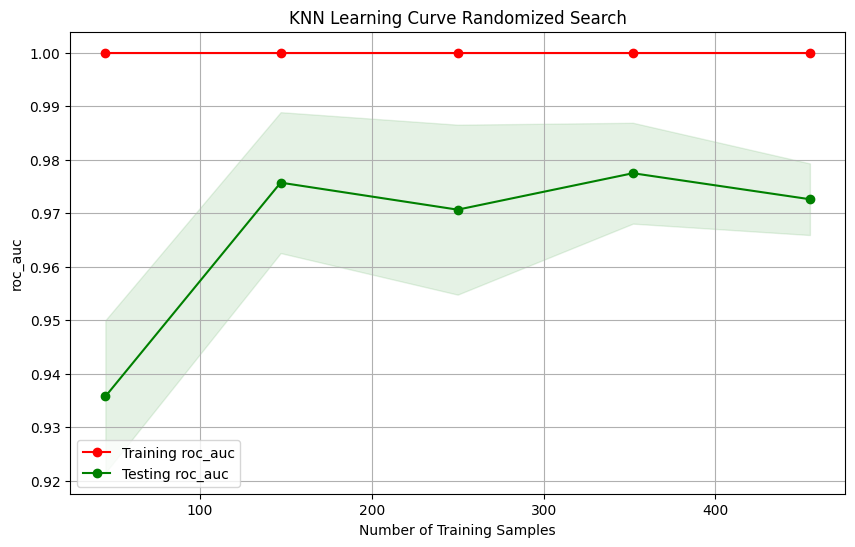

In [ ]:
plot_learning_curve_classification(knn_best_random, X, y, cv=5, scoring='roc_auc', title="KNN Learning Curve Randomized Search")

Conclusion Learning Curve Random Search:
1. Random Search juga tidak ada indikasi overfitting karena gap antara training dengant test lumayan dekat, di bawah 10%, model sudah termasuk ideal dan konvergen tidak overfitting atau underfitting

####Bayesian Optimization

In [ ]:
!pip install scikit-optimize
from skopt import BayesSearchCV

In [ ]:
# KNN Model
knn_model = KNeighborsClassifier()

# Define the hyperparameter space
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Variasi jumlah tetangga
    'weights': ['uniform', 'distance'],  # Pembobotan jarak
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Metrik jarak
}

# define np.int = int before running this cell code to avoid error
# definisikan np.int = int sebelum running code supaya menghindari error, tambahkan code dibawah ini (un-comment)
np.int = int

# Set up the BayesSearchCV
knn_bayessearch = BayesSearchCV(
    estimator=knn_model,
    search_spaces=param_dist,
    scoring='roc_auc',
    cv=5,
    n_iter=50,
    n_jobs=4,
    random_state=10,
    refit=True
)

# Find the best hyperparameters
knn_bayessearch.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = knn_bayessearch.best_params_
print("Best Hyperparameters for K Nearest Neighbor:", best_params_knn)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 11, 'uniform'] before, using random point ['euclidean', 7, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['minkowski', 3, 'distance'] before, using random point ['manhattan', 9, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 7, 'uniform'] before, using random point ['euclidean', 5, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 9, 'distance'] before, using random point ['minkowski', 9, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserW

Best Hyperparameters for K Nearest Neighbor: OrderedDict([('metric', 'manhattan'), ('n_neighbors', 11), ('weights', 'distance')])


In [ ]:
# Get the best hyperparameters and retrain the model using BayesSearchCV results
best_params = knn_bayessearch.best_params_
knn_best_bayes = KNeighborsClassifier(**best_params)
knn_best_bayes.fit(X_train, y_train)

# Predict the target values for the training and testing data
y_train_knn = knn_best_bayes.predict(X_train)
y_test_knn = knn_best_bayes.predict(X_test)

# Calculate RMSE for training and testing data
roc_auc_train_knn = roc_auc_score(y_train, y_train_knn)
roc_auc_test_knn = roc_auc_score(y_test, y_test_knn)

print("KNN ROC AUC on training set:", roc_auc_train_knn)
print("KNN ROC AUC on testing set:", roc_auc_test_knn)

KNN ROC AUC on training set: 1.0
KNN ROC AUC on testing set: 0.9580740255486406


#### Learning Curve of Bayesian Optimization Best Parameter

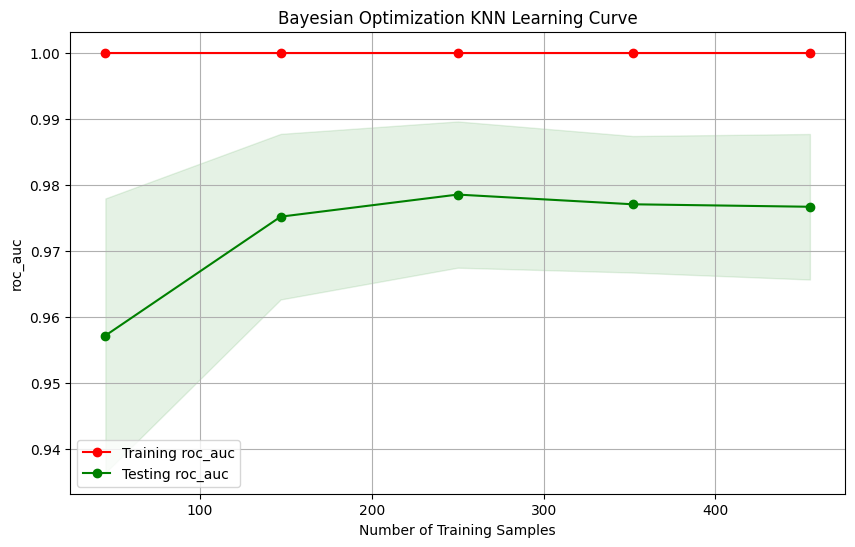

In [ ]:
plot_learning_curve_classification(knn_best_bayes, X, y, cv=5, scoring='roc_auc', title="Bayesian Optimization KNN Learning Curve")

Conclusion Bayesian Search
1. hasil dari bayesian diatas mirip seperti grid search
2. Terlihat bahwa semakin banyak sample training maka hasilnya hampir konvergen dan stabil, tidak ada indikasi overfit atau underfit, secara visualisasi selisih antara train dengan test performanya sekitar +- 3%
3. Jika dilihat pada hasil kuantitatif performa pada data test lebih rendah (0.9580) dibandingkan dengan baseline model (0.9959). Tetapi selisih dengan performa pada data train (1.0) masih belum mencapai 10% atau 0.1 sehingga belum termasuk ke overfit.

####Optuna

In [ ]:
!pip install optuna
import optuna

In [ ]:
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_neighbors = trial.suggest_categorical('n_neighbors', [3, 5, 7, 9, 11])
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

    # menghitung roc auc setelah dilakukan cv
    roc_auc_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='roc_auc')

    return roc_auc_scores.mean()  # Maximize mean ROC AUC over cross-validation folds

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2024-11-09 22:32:26,205] A new study created in memory with name: no-name-aa34ba6e-ea08-4748-8e49-8d7bf046c1e4
[I 2024-11-09 22:32:26,314] Trial 0 finished with value: 0.971721485162288 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.971721485162288.
[I 2024-11-09 22:32:26,397] Trial 1 finished with value: 0.9683616888431665 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.971721485162288.
[I 2024-11-09 22:32:26,496] Trial 2 finished with value: 0.9702244501166246 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.971721485162288.
[I 2024-11-09 22:32:26,593] Trial 3 finished with value: 0.9541679202616535 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.971721485162288.
[I 2024-11-09 22:32:26,677] Trial 4 finished with value: 0.94353258

In [ ]:
best_params = study.best_params
print("Best Hyperparameters for KNN:", best_params)

knn_best_optuna = KNeighborsClassifier(**best_params)
knn_best_optuna.fit(X_train, y_train)

y_train_knn_prob_optuna = knn_best_optuna.predict_proba(X_train)[:, 1]
y_test_knn_prob_optuna = knn_best_optuna.predict_proba(X_test)[:, 1]

roc_auc_train_optuna = roc_auc_score(y_train, y_train_knn_prob_optuna)
roc_auc_test_optuna = roc_auc_score(y_test, y_test_knn_prob_optuna)

print("ROC AUC on training set:", roc_auc_train_optuna)
print("ROC AUC on testing set:", roc_auc_test_optuna)

Best Hyperparameters for KNN: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'manhattan'}
ROC AUC on training set: 1.0
ROC AUC on testing set: 0.9977071732721913


#### Learning Curve of Optuna Best Parameter

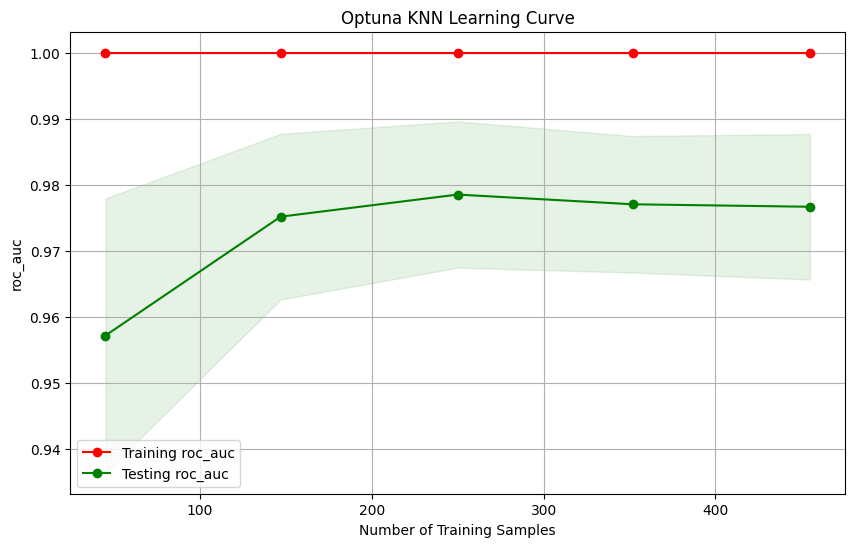

In [ ]:
plot_learning_curve_classification(knn_best_optuna, X, y, cv=5, scoring='roc_auc', title="Optuna KNN Learning Curve")

Conclusion Optuna
1. Performa sudah bagus, karena semakin banyak training samples, performanya  meningkat dan stabil, sudah termasuk ideal dan konvergen dengan gap tidak lebih dari 10%, tidak ada indikasi overfit atau underfit
2. Jika dilihat pada hasil kuantitatif performa pada data test lebih baik (0.9977) dibandingkan dengan baseline model (0.9959). Selisih dengan performa pada data train (1.0) masih belum mencapai 10% atau 0.1 sehingga belum termasuk ke overfit.
3. Jika dibandingkan dengan hasil pada bayesian optimization, Optuna memberikan hasil yang lebih baik pada kasus ini.